<a href="https://colab.research.google.com/github/swarna987456/MTech_Final_Project/blob/main/MTech_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Initial Data Preparation**


### **Import the data from kaggle**

The following data is taken from kaggle: [Source](https://www.kaggle.com/datasets/aviskumar/automatic-ticket-assignment-using-nlp).
Let's import required packages for data preparation








In [ ]:
# Kaggle API
!pip install kaggle -q

# File handling and data manipulation
import zipfile
import pandas as pd
from google.colab import files
import pickle
import warnings
warnings.filterwarnings('ignore')


# Numerical computation
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing and NLP
import re
import nltk
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

from tqdm import tqdm #to show progress bar

!pip install googletrans==3.1.0a0 -q #for translation
from googletrans import Translator

!pip install pyspellchecker -q #for spelling check and correction
from spellchecker import SpellChecker

!pip install spacy -q #spacy for lemmatization
import spacy
!python -m spacy download en_core_web_sm -q

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 55.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencie

Let's download the data from Kaggle using the API, unzip it, and create a Pandas DataFrame to begin the data cleaning process.

In [ ]:
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

dataset_name = 'aviskumar/automatic-ticket-assignment-using-nlp'

# Download the dataset
!kaggle datasets download -d {dataset_name}


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/aviskumar/automatic-ticket-assignment-using-nlp
License(s): unknown
100% 975k/975k [00:00<00:00, 1.02MB/s]
100% 975k/975k [00:00<00:00, 1.02MB/s]


In [ ]:
# Unzip the dataset
with zipfile.ZipFile(dataset_name.split('/')[-1]+'.zip', 'r') as zip_ref:
  zip_ref.extractall()

# Remove the zip file
!rm {dataset_name.split('/')[-1]}.zip

In [ ]:
data = pd.read_excel('Automatic Ticket Assignment.xlsx')

In [ ]:
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Observation**: Dataset contains total of four columns with 8500 tickets data, seems there are some null values in Description and short description fields, we will check them later on.

### **Removing Duplicate**

In [ ]:
data.duplicated().sum()

83

**Observation:** There are 83 duplicates tickets found in our dataset, so we need to remove them to avoid data redundacy.

In [ ]:
data.drop_duplicates(ignore_index = True, inplace = True)

Let's check the ticket distribution over the assignment groups

In [ ]:
data['Assignment group'].value_counts(normalize = True)

Assignment group
GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
            ...   
GRP_67    0.000119
GRP_70    0.000119
GRP_35    0.000119
GRP_61    0.000119
GRP_73    0.000119
Name: proportion, Length: 74, dtype: float64

In [ ]:
(data['Assignment group'].value_counts(normalize = True)*100).rename('percentage of tickets')

Assignment group
GRP_0     46.738743
GRP_8      7.663063
GRP_24     3.386005
GRP_12     3.053344
GRP_9      2.993941
            ...    
GRP_67     0.011881
GRP_70     0.011881
GRP_35     0.011881
GRP_61     0.011881
GRP_73     0.011881
Name: percentage of tickets, Length: 74, dtype: float64

<Axes: xlabel='Assignment group'>

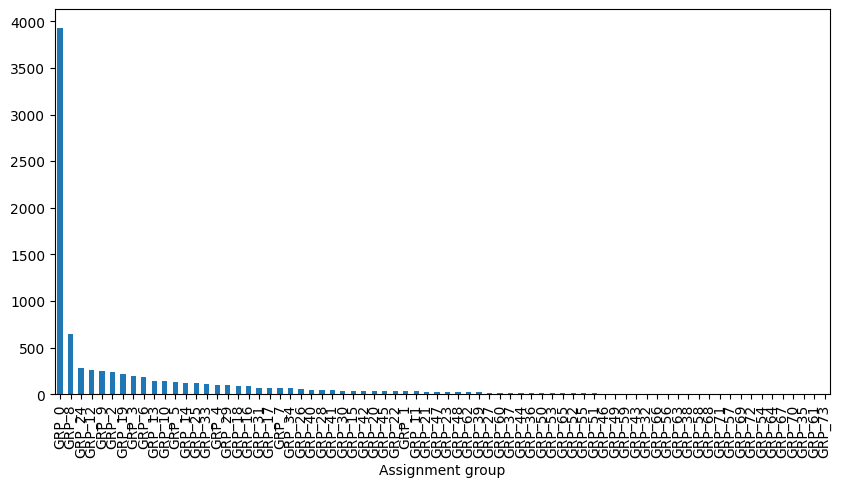

In [ ]:
plt.figure(figsize = (10,5))
data['Assignment group'].value_counts().plot(kind = 'bar')

In [ ]:
data['Assignment group'].value_counts()[data['Assignment group'].value_counts() == 1]

Assignment group
GRP_64    1
GRP_67    1
GRP_70    1
GRP_35    1
GRP_61    1
GRP_73    1
Name: count, dtype: int64

### **Assignment Group Imbalance and Skew Analysis**

**Observation**:


*   74 Unique assignment groups were observed and most of the tickets(~46%) are belonged to Group_0, Data is imbalance and skewed towards Group0.
*   Also, There are few groups having only one ticket assigned


**Solution**: We will remove assignemnt group with less than 100 tickets to improve model performance and avoid over fitting. With too few examples, the model might not generalize well and could lead to inaccurate predictions for underrepresented groups, also when a group has very few samples, the model might overfit to those specific examples, learning noise rather than generalizable patterns. This can lead to poor performance on unseen data.



In [ ]:
assignment_group_less_100 = data['Assignment group'].value_counts()[data['Assignment group'].value_counts() < 100]
print(data['Assignment group'].nunique())
print(len(assignment_group_less_100))
print(assignment_group_less_100)

74
58
Assignment group
GRP_29    97
GRP_18    88
GRP_16    85
GRP_31    69
GRP_17    68
GRP_7     68
GRP_34    62
GRP_26    56
GRP_40    45
GRP_28    44
GRP_41    40
GRP_30    39
GRP_15    38
GRP_42    37
GRP_20    36
GRP_45    35
GRP_22    31
GRP_1     31
GRP_11    30
GRP_21    28
GRP_47    27
GRP_23    25
GRP_48    25
GRP_62    25
GRP_39    19
GRP_27    18
GRP_60    16
GRP_37    16
GRP_44    15
GRP_36    15
GRP_50    14
GRP_53    11
GRP_65    11
GRP_52     9
GRP_55     8
GRP_51     8
GRP_46     6
GRP_49     6
GRP_59     6
GRP_43     5
GRP_32     4
GRP_66     4
GRP_56     3
GRP_63     3
GRP_38     3
GRP_58     3
GRP_68     3
GRP_71     2
GRP_57     2
GRP_69     2
GRP_72     2
GRP_54     2
GRP_64     1
GRP_67     1
GRP_70     1
GRP_35     1
GRP_61     1
GRP_73     1
Name: count, dtype: int64


In [ ]:
assignment_group_less_100.values.sum()

1351

In [ ]:
data_modified = data.copy()

In [ ]:
data_modified['Assignment group'] = data['Assignment group'].apply(lambda x:'other_group' if x in assignment_group_less_100.index.values else x)

In [ ]:
data_modified['Assignment group'].nunique()

17

In [ ]:
df1 = data_modified[data_modified['Assignment group']!='other_group'].copy()
df1.reset_index(drop = True, inplace = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7066 entries, 0 to 7065
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  7059 non-null   object
 1   Description        7065 non-null   object
 2   Caller             7066 non-null   object
 3   Assignment group   7066 non-null   object
dtypes: object(4)
memory usage: 220.9+ KB


In [ ]:
df1['Assignment group'].nunique()

16

<Axes: xlabel='Assignment group'>

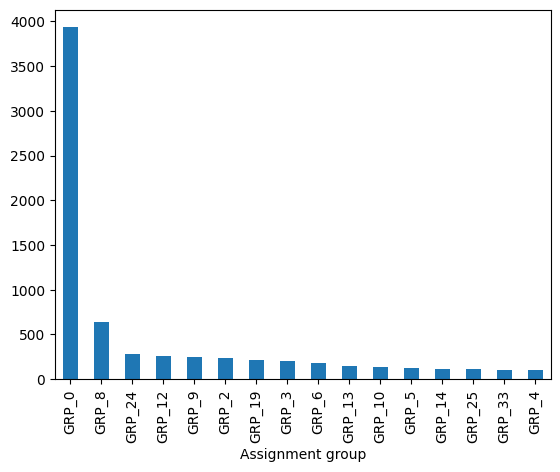

In [ ]:
df1['Assignment group'].value_counts().plot(kind = 'bar')

After compressing assignment group to less, final dataset1 contains 16 assignment groups with total of 7066 rows(tickets)

In [ ]:
df1

Short description  \
0                                           login issue   
1                                               outlook   
2                                    cant log in to vpn   
3                         unable to access hr_tool page   
4                                          skype error    
...                                                 ...   
7061                 hr_tool etime option not visitble    
7062           erp fi  - ob09, two accounts to be added   
7063  tablet needs reimaged due to multiple issues w...   
7064                           telephony_software issue   
7065  vip2: windows password reset for tifpdchb pedx...   

                                            Description             Caller  \
0     -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2     _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
...                                                 ...                ...   
7061                 hr_tool etime option not visitble   tmopbken ibzougsd   
7062  i am sorry, i have another two accounts that n...  ipwjorsc uboapexr   
7063  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
7064                           telephony_software issue  rbozivdq gmlhrtvp   
7065  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   

     Assignment group  
0               GRP_0  
1               GRP_0  
2               GRP_0  
3               GRP_0  
4               GRP_0  
...               ...  
7061            GRP_0  
7062           GRP_10  
7063            GRP_3  
7064            GRP_0  
7065            GRP_0  

[7066 rows x 4 columns]

### **Column Names Standardization & Pruning**

Column names are not in standard form, so we will standardized the column names by converting them to lowercase and combining words with underscores. Additionally, removed the "Caller" column as it does not provide any useful information for modeling.

In [ ]:
columns = {'Short description':'short_description','Description':'long_description','Assignment group':'assignment_group'}
df1.rename(columns = columns,inplace = True)

In [ ]:
df1.drop('Caller',axis = 1,inplace = True)

In [ ]:
df1.head()

short_description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                    long_description assignment_group  
0  -verified user details.(employee# & manager na...            GRP_0  
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...            GRP_0  
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...            GRP_0  
3                      unable to access hr_tool page            GRP_0  
4                                       skype error             GRP_0

### **Duplicate Description Rows Identification and filtering**

Let's check if there is any redundacy in short and long descriptions for each ticket

In [ ]:
df1.shape

(7066, 3)

In [ ]:
short_long_descriptions_redundancy = df1[df1['short_description'] == df1['long_description']]
short_long_descriptions_redundancy

short_description  \
3                         unable to access hr_tool page   
4                                          skype error    
5        unable to log in to engineering tool and skype   
6     ticket_no1550391- employment status - new non-...   
7                  unable to disable add ins on outlook   
...                                                 ...   
7060                                     account locked   
7061                 hr_tool etime option not visitble    
7063  tablet needs reimaged due to multiple issues w...   
7064                           telephony_software issue   
7065  vip2: windows password reset for tifpdchb pedx...   

                                       long_description assignment_group  
3                         unable to access hr_tool page            GRP_0  
4                                          skype error             GRP_0  
5        unable to log in to engineering tool and skype            GRP_0  
6     ticket_no1550391- employment status - new non-...            GRP_0  
7                  unable to disable add ins on outlook            GRP_0  
...                                                 ...              ...  
7060                                     account locked            GRP_0  
7061                 hr_tool etime option not visitble             GRP_0  
7063  tablet needs reimaged due to multiple issues w...            GRP_3  
7064                           telephony_software issue            GRP_0  
7065  vip2: windows password reset for tifpdchb pedx...            GRP_0  

[2628 rows x 3 columns]

In [ ]:
print('Total number of rows', df1.shape[0])
print('rows where the Short description and long Description columns have the same content',short_long_descriptions_redundancy.shape[0])

Total number of rows 7066
rows where the Short description and long Description columns have the same content 2628


In [ ]:
(2628/7066)*100

37.192187942258705

**Observation:** 37% of the tickets contain the same content in both their short and long descriptions. To avoid duplicate and redundant data in modeling, we need to replace the short descriptions with a space when they match the long descriptions.

In [ ]:
df1.loc[short_long_descriptions_redundancy.index, 'short_description'] = ' '

In [ ]:
df1[df1['short_description'] == df1['long_description']]

Empty DataFrame
Columns: [short_description, long_description, assignment_group]
Index: []

### **Handling Missing Data**

In [ ]:
df1.isnull().sum().rename('null-value count')

short_description    7
long_description     1
assignment_group     0
Name: null-value count, dtype: int64

In [ ]:
#lets observe null values
mask = df1.isnull()
df1[mask.any(axis = 1)]

short_description  \
2859                       NaN   
3285                       NaN   
3288                       NaN   
3292                       NaN   
3298                       NaN   
3301                       NaN   
3648                       NaN   
3693  i am locked out of skype   

                                       long_description assignment_group  
2859  _x000D_\n-connected to the user system using t...            GRP_0  
3285  -user unable  tologin to vpn._x000D_\n-connect...            GRP_0  
3288  -user unable  tologin to vpn._x000D_\n-connect...            GRP_0  
3292  -user unable  tologin to vpn._x000D_\n-connect...            GRP_0  
3298  -user unable  tologin to vpn._x000D_\n-connect...            GRP_0  
3301  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...            GRP_0  
3648  _x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...            GRP_0  
3693                                                NaN            GRP_0

**Observation:** In our dataset, null values were found in both the short and long descriptions, but they were minimal. Instead of removing those rows completely, we will impute the null values with a space in our ticket data.

In [ ]:
df1.fillna(' ',inplace = True)

In [ ]:
df1.isnull().sum().rename('blank/null values')

short_description    0
long_description     0
assignment_group     0
Name: blank/null values, dtype: int64

### **Merging Descriptions into a Single Field**

We will combine both short and long descriptions into a single column as ‘description’. This is to simplify text preprocessing and we can apply text cleaning techiniques once, rather than separately for each description type going forward.

In [ ]:
df1['description'] = df1['short_description']+' '+df1['long_description']

In [ ]:
df1 = df1.drop(['short_description','long_description'],axis = 1)

In [ ]:
df1.head()

assignment_group                                        description
0            GRP_0  login issue -verified user details.(employee# ...
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...
3            GRP_0                      unable to access hr_tool page
4            GRP_0                                       skype error

In [ ]:
def merge_descriptions(df):

  df['description'] = df['short_description'] + ' ' + df['long_description']
  df = df.drop(['short_description', 'long_description'], axis=1)
  return df

In [ ]:
df1 = merge_descriptions(df1)

In [ ]:
df1.head()

assignment_group                                        description
0            GRP_0  login issue -verified user details.(employee# ...
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...
3            GRP_0                      unable to access hr_tool page
4            GRP_0                                       skype error

Now our data is ready for further text cleaning [on description column]

# **Text Cleaning - Preprocessing**

Let's observe the text data

In [ ]:
df1

assignment_group                                        description
0               GRP_0  login issue -verified user details.(employee# ...
1               GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2               GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...
3               GRP_0                      unable to access hr_tool page
4               GRP_0                                       skype error 
...               ...                                                ...
7061            GRP_0                 hr_tool etime option not visitble 
7062           GRP_10  erp fi  - ob09, two accounts to be added i am ...
7063            GRP_3    tablet needs reimaged due to multiple issues...
7064            GRP_0                           telephony_software issue
7065            GRP_0    vip2: windows password reset for tifpdchb pe...

[7066 rows x 2 columns]

In [ ]:
df1.sample(5)

assignment_group                                        description
5351            GRP_0  there were 3 undeliverable e-mails returned wi...
81              GRP_6  job apo_bop_plant_283a failed in job_scheduler...
3194            GRP_0              require new driver for local printer.
2736            GRP_0  reset the password for qekdgaim wagshrzl on er...
5412            GRP_8  job Job_3049 failed in job_scheduler at: 08/24...

In [ ]:
df1.tail(5)

assignment_group                                        description
7061            GRP_0                 hr_tool etime option not visitble 
7062           GRP_10  erp fi  - ob09, two accounts to be added i am ...
7063            GRP_3    tablet needs reimaged due to multiple issues...
7064            GRP_0                           telephony_software issue
7065            GRP_0    vip2: windows password reset for tifpdchb pe...

In [ ]:
df1[df1['description'].str.contains('\n|\x000d')]

assignment_group                                        description
0               GRP_0  login issue -verified user details.(employee# ...
1               GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2               GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...
15              GRP_0  unable to login to company vpn \n\nreceived fr...
20              GRP_0  vpn issue _x000D_\n_x000D_\nreceived from: uge...
...               ...                                                ...
7052            GRP_9  ess portal \n\nreceived from: eagvusbr.nguqity...
7054            GRP_0  fw: case id [ref:_case-111121032:ref] :: other...
7058            GRP_3  telephony_software is missing from pc pc recei...
7059            GRP_0  erp account unlock name:mfeyouli ndobtzpw\nlan...
7062           GRP_10  erp fi  - ob09, two accounts to be added i am ...

[3593 rows x 2 columns]

**Other Language Detected (along with English)**

In [ ]:
translator = Translator()
# Example
text = "anzeigen der bestellã¼bersicht im erp netweaver portal nicht mã¶glich im erp netweaver portal ist es nicht mehr mã¶glich unter dem paramdntyeter 'feinnavigation' die bestellã¼bersicht aufzurufen._x000d_ siehe angefã¼gte screenshots"
detected = translator.detect(text)
translated = translator.translate(text, dest='en')
print(f"Detected language: {detected.lang}")
print(f"Translated text: {translated.text}")


Detected language: de
Translated text: Displaying the order overview in the erp netweaver portal is no longer possible in the erp netweaver portal it is no longer possible to call up the order overview under the paramdntyeter 'fine navigation'._x000d_ see attached screenshots


**"de" stands for German in Google Translate's detected language.**

In [ ]:
#numbers presented in each group
df1[df1['description'].str.contains(r'\d')].assignment_group.value_counts()

assignment_group
GRP_0     1895
GRP_8      641
GRP_9      238
GRP_12     230
GRP_2      190
GRP_6      182
GRP_19     134
GRP_10     133
GRP_13     133
GRP_5      128
GRP_24     115
GRP_14     104
GRP_3      103
GRP_33      84
GRP_4       78
GRP_25      71
Name: count, dtype: int64

**Observations from descriptions:**

1.	The data contains both uppercase and lowercase letters.
2.	Descriptions frequently include carriage return (\x000d) and newline (\n) characters, which can disrupt text flow.
3.	While the majority of descriptions are in English, some contain text in other languages, such as German.
4. The data contains a variety of special characters, including non-ASCII characters, punctuation marks, and symbols. These characters can interfere with text processing and analysis.
5. Some descriptions include masked email addresses and user names, such as masked_id@company.com, masked_id@gmail.com, firstname.lastname@gmail.com, were found in the data.
6. A small number of descriptions contain references to image attachments.
7. Some of the descriptions include numbers, dates, and times.
8. Certain words, such as greetings, 'received,' 'from,' 'hi,' 'hello,'please,' 'emailto,' 'kind,' and 'kindly' has found and need to be removed from descriptions to simplify the text and eliminate unnecessary complexity.


## Text Cleaning Steps1:

In [ ]:
text = df1.loc[50, 'description']
print(text)
print("********************")
text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', ' ',text)
print(text)


reset scm_software password 

received from: cdbaoqts.wqbsodni@gmail.com

hello,

please reset my scm_software password.


cdbaoqts wqbsodni
global product manager, markhtyeting initiatives
cdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>






********************
reset scm_software password 

received from:  

hello,

please reset my scm_software password.


cdbaoqts wqbsodni
global product manager, markhtyeting initiatives
 <mailto: >








In [ ]:
text = df1.loc[1, 'description']
print(text)
print("********************")
text = re.sub(r'\S+\.\S+@gmail\.com', ' ',text)
print(text)

outlook _x000D_
_x000D_
received from: hmjdrvpb.komuaywn@gmail.com_x000D_
_x000D_
hello team,_x000D_
_x000D_
my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_
_x000D_
kind 
********************
outlook _x000D_
_x000D_
received from:  _x000D_
_x000D_
hello team,_x000D_
_x000D_
my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?_x000D_
_x000D_
kind 


In [ ]:
words_to_remove = ['received',
 'from',
 'hi',
 'hello',
 'please',
 'emailto',
 'kind',
 'kindly',
 'help']

In [ ]:
def text_cleaning_steps_1(text):
  text = text.lower()
  translated = translator.translate(text, src='de', dest='en')#translating from German to English
  text = translated.text
  text = text.replace('x000d',' ')
  text = text.replace('\n',' ')
  text = text.replace('â€',' ')
  text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', ' ',text) #General pattern to remove any email address
  text = re.sub(r'\S+\.\S+@gmail\.com', ' ', text) # Specific pattern to remove emails like "something.something@gmail.com"
  text = re.sub(r'\[\s*cid:[^\]]+\]',' ',text) #images pattern
  text = re.sub(r'\d+', ' ', text) # removing numbers
  text = re.sub(r"[^\w\s']", ' ', text) # removing special characters except '(apostrophe, to not to breaks words don't, won't etc meaning)
  text = text.encode("ascii", "ignore").decode() # removing non-ascii characters
  text = ' '.join([word for word in text.split() if word not in words_to_remove]) #removing few words
  text = re.sub(r"[^a-zA-Z0-9\s]", ' ', text) #removing puntuations
  text = text.strip()

  return text

In [ ]:
#Testing above function on index 2790

print(df1['description'][2790])
print("*******")
new_text=  text_cleaning_steps_1(df1['description'][2790])
print(new_text)


anzeigen der bestellÃ¼bersicht im erp netweaver portal nicht mÃ¶glich im erp netweaver portal ist es nicht mehr mÃ¶glich unter dem paramdntyeter "feinnavigation" die bestellÃ¼bersicht aufzurufen._x000D_
siehe angefÃ¼gte screenshots
*******
Displaying the order overview in the erp netweaver portal is no longer possible in the erp netweaver portal it is no longer possible to call up the order overview under the paramdntyeter fine navigation     see attached screenshots


In [ ]:
for i in tqdm(range(len(df1))):
  df1.loc[i,'description_cleaned'] = text_cleaning_steps_1(df1['description'].iloc[i])

100%|██████████| 7066/7066 [14:58<00:00,  7.86it/s]


In [ ]:
df1.head()

assignment_group                                        description  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3            GRP_0                      unable to access hr_tool page   
4            GRP_0                                       skype error    

                                 description_cleaned  
0  login issue verified user details employee man...  
1  outlook                 team         my meetin...  
2  cant log in to vpn                 hi        i...  
3                      unable to access hr tool page  
4                                        skype error

Cleaning steps:

1. **Lowercase conversion:** Convert all text to lowercase for consistent analysis.
2. **Line break removal:** Replace carriage return (`\x000d`) and newline (`\n`) characters with spaces for smoother text flow.
3. **Language translation:** Translate non-English descriptions (e.g., German) to English for consistency.
4. **Special character removal:** Remove non-ASCII characters, punctuation marks, and other special characters using regular expressions.
5. **Masked user information replacement:** Replace masked email addresses and potentially identifiable names with spaces.
6. **Image reference removal:** Remove references to image attachments (JPG, PNG) as they are not text data.
7. **Numeric and temporal data removal:** Remove numbers, dates, and times since they might not be relevant to the analysis.
8. **Stop word removal:** Remove common words like greetings ("hi", "hello"), prepositions ("from", "to"), and courtesy terms ("please", "kindly") to simplify the text.


In [ ]:
special_chars = set()
for text in df1['description_cleaned']:
  for char in text:
    if not char.isalnum() and not char.isspace():
      special_chars.add(char)

print(special_chars)


set()


In [ ]:
numbers_exist = df1['description_cleaned'].str.contains(r'\d').any()

if numbers_exist:
  print("Numbers are present")
  number_counts = df1['description_cleaned'].str.findall(r'\d+').explode().value_counts()
  print("Count of each number:")
  print(number_counts)
else:
  print("No numbers found ")


No numbers found 


## Text Cleaning Steps2:

### Lemmatization

**Lemmatization**: As part of text cleaning process for modeling, we need to perform lemmatization techniques on the text data.

It is the process of reducing a word to its base or root form, called a "lemma." This is different from stemming, which simply cuts off word endings. Lemmatization considers the word's meaning and context to find the correct base form.

**Why is lemmatization important?**

* **Reduces redundancy:** It groups different forms of a word together, making the data less messy.
* **Improves accuracy:** By standardizing words, it helps in tasks like classifying text or finding information.
* **Better understanding:** Lemmatization understands the word's meaning and context, which is often better than stemming, especially for complex language tasks.
* **Reduces complexity:** It simplifies the data by converting words to their root forms, making it easier to process.



In [ ]:
df1.head()

assignment_group                                        description  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3            GRP_0                      unable to access hr_tool page   
4            GRP_0                                       skype error    

                                 description_cleaned  
0  login issue verified user details employee man...  
1  outlook                 team         my meetin...  
2  cant log in to vpn                 hi        i...  
3                      unable to access hr tool page  
4                                        skype error

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    lemmas = []
    for token in nlp(text):
        if token.text.strip():
            lemmas.append(token.lemma_.lower())
    return lemmas

test_data = lemmatize_text('resolve resolving resolves')
print(test_data)

['resolve', 'resolve', 'resolve']


In [ ]:
df1['description_lemmatized'] = df1['description_cleaned'].apply(lemmatize_text)

### Stop Words Removal

**Stop Words Removal**

Also, we need to remove any stop words that are presented in our data:


Stop words are common words in a language that are often filtered out during text preprocessing in Natural Language Processing (NLP) tasks. These words include articles, prepositions, conjunctions, and other words that don't carry significant meaning and don't contribute much to the overall context of the text.

**Why Remove Stop Words?**

* **Reduces Noise:** Stop words are frequent and can overshadow the meaningful words in a document. Removing them helps focus on the words that carry more semantic weight.
* **Improves Model Performance:** By reducing the number of words, we reduce the dimensionality of the data, making machine learning models more efficient and faster to train.
* **Enhances Text Representation:** Stop words don't add much value to tasks like text classification, sentiment analysis, or information retrieval. Removing them helps highlight the more important words that define the content.


In [ ]:
# Get stop words for English
stop_words = set(stopwords.words('english'))

stop_word_counts = Counter()
for tokens in df1['description_lemmatized']:
  for token in tokens:
    if token in stop_words:
      stop_word_counts[token] += 1

print('Total number of stop words ',len(stop_word_counts))
# Print the counts
for word, count in stop_word_counts.items():
  print(f"'{word}': {count}")

Total number of stop words  127
'the': 5488
'in': 4105
'and': 2345
'to': 6258
'that': 616
'he': 228
'be': 5440
'my': 1022
'not': 2381
'can': 1125
'how': 101
'this': 1222
'i': 3092
'on': 2239
'no': 2835
's': 514
'a': 2125
'below': 338
'but': 419
'through': 108
'as': 526
'we': 698
'when': 569
'will': 318
'into': 228
'now': 219
'it': 1273
'if': 454
'with': 1081
'your': 349
'here': 50
'for': 1937
'm': 229
'of': 1500
'out': 382
'd': 1123
'have': 1467
'an': 414
'they': 155
'other': 231
'its': 46
'do': 901
'so': 153
'up': 310
'after': 202
'few': 50
'you': 896
'by': 445
'at': 2247
'about': 66
'while': 89
'or': 493
'again': 140
've': 27
't': 512
'down': 441
'what': 463
'over': 83
're': 128
'his': 117
'there': 193
'our': 210
'nor': 11
'above': 32
'all': 370
'same': 199
'these': 119
'before': 79
'doesn': 86
'off': 59
'some': 130
'any': 234
'more': 84
'should': 93
'o': 79
'don': 60
'until': 66
'then': 124
'am': 56
'just': 83
'once': 33
'only': 157
'both': 34
'under': 56
'between': 23
'didn': 15
'w

In [ ]:
def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

df1['description_lemmatized_with_no_stop_words'] = df1['description_lemmatized'].apply(remove_stopwords)

In [ ]:
stop_word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if token in stop_words:
      stop_word_counts[token] += 1

print('Total number of stop words ',len(stop_word_counts))
# Print the counts
for word, count in stop_word_counts.items():
  print(f"'{word}': {count}")

Total number of stop words  0


### Removing less informative words | Reducing Noise:

Let's observe the data and check if there are any less informative words in order to remove noise from the data.

In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1['description_lemmatized_with_no_stop_words']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 139549
Number of unique words: 8837


In [ ]:
# Calculate word frequencies
word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    word_counts[token] += 1

total_words = sum(word_counts.values())

high_frequency_words = word_counts.most_common(50)

# Print the high frequency words with counts and percentages
print("Top 20 high frequency words:")
for word, count in high_frequency_words:
  percentage = (count / total_words) * 100
  print(f"'{word}': {count} ({percentage:.2f}%)")


Top 20 high frequency words:
'job': 4714 (3.38%)
'tool': 2264 (1.62%)
'company': 2210 (1.58%)
'yes': 2012 (1.44%)
'na': 1997 (1.43%)
'scheduler': 1792 (1.28%)
'password': 1778 (1.27%)
'fail': 1666 (1.19%)
'erp': 1479 (1.06%)
'user': 1362 (0.98%)
'com': 1188 (0.85%)
'access': 1182 (0.85%)
'sid': 1177 (0.84%)
'issue': 1150 (0.82%)
'reset': 1016 (0.73%)
'work': 981 (0.70%)
'ticket': 935 (0.67%)
'unable': 919 (0.66%)
'monitor': 874 (0.63%)
'email': 842 (0.60%)
'error': 830 (0.59%)
'account': 825 (0.59%)
'e': 812 (0.58%)
'site': 779 (0.56%)
'hostname': 717 (0.51%)
'circuit': 699 (0.50%)
'need': 692 (0.50%)
'power': 677 (0.49%)
'login': 662 (0.47%)
'system': 653 (0.47%)
'network': 648 (0.46%)
'outlook': 646 (0.46%)
'f': 638 (0.46%)
'name': 635 (0.46%)
'vendor': 568 (0.41%)
'x': 560 (0.40%)
'c': 541 (0.39%)
'get': 533 (0.38%)
'backup': 516 (0.37%)
'use': 493 (0.35%)
'telecom': 487 (0.35%)
'update': 480 (0.34%)
'problem': 479 (0.34%)
'outage': 467 (0.33%)
'change': 462 (0.33%)
'message': 459 (

Let's check few of them

In [ ]:
df1[df1['description_lemmatized_with_no_stop_words'].apply(lambda x: 'company' in x)].sample(5)

assignment_group                                        description  \
3993            GRP_6  job snp_heu_1_regen failed in job_scheduler at...   
336             GRP_8  job Job_1854 failed in job_scheduler at: 10/26...   
83              GRP_8  job mm_zscr0099_wkly_rollfgyuej1 failed in job...   
1350            GRP_8  job Job_593 failed in job_scheduler at: 10/13/...   
1898            GRP_8  job bkwin_HostName_770_inc failed in job_sched...   

                                    description_cleaned  \
3993  job snp heu   regen failed in job scheduler at...   
336   job job  failed in job scheduler at monitoring...   
83    job mm zscr  wkly rollfgyuej failed in job sch...   
1350  job job  failed in job scheduler at monitoring...   
1898  job bkwin hostname   inc failed in job schedul...   

                                 description_lemmatized  \
3993  [job, snp, heu, regen, fail, in, job, schedule...   
336   [job, job, fail, in, job, scheduler, at, monit...   
83    [job, mm, zscr, wkly, rollfgyuej, fail, in, jo...   
1350  [job, job, fail, in, job, scheduler, at, monit...   
1898  [job, bkwin, hostname, inc, fail, in, job, sch...   

              description_lemmatized_with_no_stop_words  
3993  [job, snp, heu, regen, fail, job, scheduler, m...  
336   [job, job, fail, job, scheduler, monitor, tool...  
83    [job, mm, zscr, wkly, rollfgyuej, fail, job, s...  
1350  [job, job, fail, job, scheduler, monitor, tool...  
1898  [job, bkwin, hostname, inc, fail, job, schedul...

In [ ]:
df1[df1['description_lemmatized_with_no_stop_words'].apply(lambda x: 'user' in x)].head(5)

assignment_group                                        description  \
0             GRP_0  login issue -verified user details.(employee# ...   
6             GRP_0    ticket_no1550391- employment status - new no...   
12            GRP_0                   user wants to reset the password   
22            GRP_0                user called for vendor phone number   
30            GRP_0  reset  users hi\n\nplease reset users password...   

                                  description_cleaned  \
0   login issue verified user details employee man...   
6   ticket no employment status new non employee e...   
12                   user wants to reset the password   
22                user called for vendor phone number   
30  reset users reset users password client id use...   

                               description_lemmatized  \
0   [login, issue, verify, user, detail, employee,...   
6   [ticket, no, employment, status, new, non, emp...   
12             [user, want, to, reset, the, password]   
22           [user, call, for, vendor, phone, number]   
30  [reset, user, reset, user, password, client, i...   

            description_lemmatized_with_no_stop_words  
0   [login, issue, verify, user, detail, employee,...  
6   [ticket, employment, status, new, non, employe...  
12                      [user, want, reset, password]  
22                [user, call, vendor, phone, number]  
30  [reset, user, reset, user, password, client, u...

In [ ]:
single_letter_tokens = []
two_letter_tokens = []

for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if len(token) == 1:
      single_letter_tokens.append(token)
    elif len(token) == 2:
      two_letter_tokens.append(token)

print("Single letter tokens:", Counter(single_letter_tokens))
print("Two letter tokens:", Counter(two_letter_tokens))


Single letter tokens: Counter({'e': 812, 'f': 638, 'x': 560, 'c': 541, 'b': 365, 'u': 130, 'g': 112, 'p': 107, 'w': 88, 'r': 82, 'n': 73, 'k': 69, 'h': 52, 'z': 44, 'j': 37, 'v': 35, 'q': 28, 'l': 22})
Two letter tokens: Counter({'na': 1997, 'pm': 320, 'pc': 317, 'ip': 246, 'hr': 233, 'eu': 217, 'go': 176, 'ms': 154, 'ap': 135, 'sw': 133, 'et': 122, 'ad': 117, 'cc': 94, 'mm': 83, 'pp': 63, 'ic': 54, 'ex': 52, 'th': 50, 'pl': 49, 'gb': 49, 'mr': 47, 'bk': 47, 'ie': 44, 'fw': 44, 'dp': 40, 'ws': 40, 'ok': 38, 'hp': 37, 'dn': 36, 'de': 36, 'dc': 33, 'qa': 31, 'wy': 31, 'os': 31, 'co': 31, 'bc': 29, 'hq': 28, 'sr': 28, 'mp': 28, 'eb': 27, 'bw': 26, 'df': 26, 'tc': 24, 'fy': 24, 'pu': 23, 'ac': 23, 'fi': 22, 'cl': 22, 'ba': 22, 'st': 21, 'wu': 21, 'sa': 21, 'pw': 20, 'us': 20, 'va': 20, 'ab': 20, 'mb': 19, 'id': 19, 'ds': 19, 'sf': 19, 'wi': 18, 'md': 18, 'fd': 18, 'po': 18, 'fa': 17, 'pa': 17, 'db': 17, 'en': 16, 'pi': 16, 'gl': 16, 'hi': 15, 'ef': 15, 'nd': 15, 'dv': 15, 'er': 14, 'wp': 1

In [ ]:
less_informative_words = [word for word, count in Counter(two_letter_tokens).items() if count < 10]
print(less_informative_words)

['uk', 'al', 'mx', 'sv', 'cs', 'gv', 'ul', 'ka', 'dl', 'kd', 'pk', 'sn', 'eq', 'ag', 'mw', 'wk', 'ii', 'rd', 'aw', 'ou', 'hz', 'hd', 'vp', 'dr', 'vb', 'nc', 'cv', 'ps', 'pn', 'qc', 'br', 'sg', 'rk', 'ks', 'aa', 'fp', 'eh', 'bd', 'sk', 'rr', 'qm', 'gr', 'ne', 'un', 'su', 'nk', 'rj', 'nx', 'pe', 'fu', 'sh', 'oa', 'rs', 'dw', 'tr', 'ia', 'ph', 'vh', 'wg', 'lt', 'ir', 'mo', 'wf', 'vf', 'ed', 'kq', 'oh', 'bi', 'sm', 'pf', 'gt', 'ey', 'il', 'wc', 'zj', 'mt', 'tx', 'vv', 'gj', 'jb', 'ug', 'zm', 'qt', 'lc', 'xe', 'xz', 'nb', 'dg', 'lv', 'ti', 'se', 'gd', 'uy', 'cm', 'lo', 'la', 'el', 'cp', 'vc', 'wj', 'au', 'af', 'ec', 'dz', 'ht', 'tp', 'xf', 'bf', 'ng', 'sl', 'xp', 'qs', 'fo', 'cb', 'vu', 'ea', 'ki', 'wb', 'kk', 'ft', 'lb', 'rm', 'wv', 'bb', 'te', 'xt', 'zg', 'iu', 'kn', 'fq', 'cg', 'oq', 'zw', 'dt', 'sb', 'hy', 'wx', 'lx', 'ja', 'yb', 'mi', 'kb', 'gi', 'gf', 'si', 'py', 'wl', 'kg', 'vm', 'mc', 'cn', 'oc', 'cd', 'nt', 'av', 'fs', 'hx', 'ao', 'gn', 'fx', 'fh', 'mu', 'ar', 'vs', 'wh', 'tn', 'tm

In [ ]:
three_letter_tokens = []

for tokens in df1['description_lemmatized_with_no_stop_words']:
  for token in tokens:
    if len(token) == 3:
      three_letter_tokens.append(token)

print("Three letter tokens:", Counter(three_letter_tokens))

less_informative_words_3 = [word for word, count in Counter(three_letter_tokens).items() if count < 10]
print(less_informative_words_3)


Three letter tokens: Counter({'job': 4714, 'yes': 2012, 'erp': 1479, 'com': 1188, 'sid': 1177, 'get': 533, 'use': 493, 'log': 438, 'vpn': 416, 'new': 409, 'try': 381, 'see': 367, 'usa': 349, 'tcp': 300, 'asa': 266, 'crm': 233, 'add': 214, 'run': 197, 'inc': 186, 'gsc': 181, 'src': 181, 'dst': 181, 'via': 170, 'acl': 168, 'top': 157, 'one': 153, 'set': 148, 'aug': 125, 'let': 121, 'may': 116, 'sep': 115, 'app': 101, 'day': 99, 'fix': 98, 'due': 96, 'old': 93, 'say': 84, 'per': 83, 'win': 83, 'ess': 82, 'exe': 80, 'etc': 71, 'sir': 70, 'web': 67, 'ask': 66, 'pls': 64, 'vip': 64, 'jul': 64, 'mii': 62, 'two': 57, 'net': 57, 'bex': 56, 'plm': 55, 'hrp': 54, 'end': 53, 'rtr': 53, 'tax': 48, 'vid': 48, 'hub': 46, 'pdf': 46, 'snp': 44, 'heu': 44, 'syn': 44, 'dsw': 43, 'tab': 41, 'bit': 41, 'hex': 39, 'www': 36, 'soc': 36, 'sto': 35, 'gso': 34, 'box': 34, 'arc': 34, 'lan': 33, 'rpc': 30, 'key': 29, 'non': 28, 'sql': 28, 'org': 28, 'pop': 28, 'sle': 28, 'xed': 28, 'apo': 27, 'php': 27, 'tag': 26

In [ ]:
less_informative_words.extend(['pm','go','et','cc','pls','yes','na','no','get','request','kind','assist','user','name','thank you','welcome','regards','etc','hi'],) #adding less informative words

In [ ]:
less_informative_words.extend(less_informative_words_3)

Observation:



*   From the given examples: There are some issues reported received from monitoring_tool@company.com, some having issues with company portal and some other scenarios. So each with different context.







In [ ]:
def remove_less_informative_words(tokens):
  return [token for token in tokens if len(token) > 1 and token not in less_informative_words]

df1['description_lemmatized_with_no_stop_words_no_less_informative_words'] = df1['description_lemmatized_with_no_stop_words'].apply(remove_less_informative_words)

**Removing less informative words | Reducing Noise:**

 Removing less informative words or tokens is a critical preprocessing step. This helps to focus the model on the more significant and distinctive features of the text, thereby improving the performance, accuracy of the classificationa and could be useful to mitigate the curse of dimensionality, improving the performance and efficiency classifier. We found below noise words in descriptions and removed them.

  1. Single-Letter Tokens: There are some single words presented in the descriptions these words with just one letter don’t add much meaning to the text. Removed them to help the model focus on more important words.

  2. Less informative Tokens with low frequncy: Two and three letters words with low frequency (< 10) and less informative are removed. Words and phrases like “request”, “thank you”, or “regards” are often too generic to be useful in classification, so removed them.

  3. Yes/No/NA Responses: If the text includes a lot of yes/no/NA answers, they might not help much in classifying the text into groups. Removed these responses to make the model focus on more meaningful content.

  4. Solution: Created python function called ‘remove_less_informative_words’ and applied the function on the ‘description_lemmatized_with_no_stop_words’ column and added the result to the ‘description_lemmatized_with_no_stop_words_no_less_informative_words column.


In [ ]:
# Checking if single-letter tokens still exist
single_letter_tokens = []
for tokens in df1['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    if len(token) == 1:
      single_letter_tokens.append(token)

if single_letter_tokens:
  print("Single letter tokens still exist:", Counter(single_letter_tokens))
else:
  print("No single-letter tokens found")

# Check if less informative words still exist
less_informative_word_counts = Counter()
for tokens in df1['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    if token in less_informative_words:
      less_informative_word_counts[token] += 1

if less_informative_word_counts:
  print("Less informative words still exist:", less_informative_word_counts)
else:
  print("No less informative words found")


No single-letter tokens found
No less informative words found


In [ ]:
df1.head()

assignment_group                                        description  \
0            GRP_0  login issue -verified user details.(employee# ...   
1            GRP_0  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2            GRP_0  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3            GRP_0                      unable to access hr_tool page   
4            GRP_0                                       skype error    

                                 description_cleaned  \
0  login issue verified user details employee man...   
1  outlook                 team         my meetin...   
2  cant log in to vpn                 hi        i...   
3                      unable to access hr tool page   
4                                        skype error   

                              description_lemmatized  \
0  [login, issue, verify, user, detail, employee,...   
1  [outlook, team, my, meeting, skype, meeting, e...   
2  [can, not, log, in, to, vpn, hi, i, can, not, ...   
3               [unable, to, access, hr, tool, page]   
4                                     [skype, error]   

           description_lemmatized_with_no_stop_words  \
0  [login, issue, verify, user, detail, employee,...   
1  [outlook, team, meeting, skype, meeting, etc, ...   
2                     [log, vpn, hi, log, vpn, good]   
3                   [unable, access, hr, tool, page]   
4                                     [skype, error]   

  description_lemmatized_with_no_stop_words_no_less_informative_words  
0  [login, issue, verify, detail, employee, manag...                   
1  [outlook, team, meeting, skype, meeting, appea...                   
2                         [log, vpn, log, vpn, good]                   
3                   [unable, access, hr, tool, page]                   
4                                     [skype, error]

In [ ]:
df1.columns

Index(['assignment_group', 'description', 'description_cleaned',
       'description_lemmatized', 'description_lemmatized_with_no_stop_words',
       'description_lemmatized_with_no_stop_words_no_less_informative_words'],
      dtype='object')

In [ ]:
df1_cleaned = df1[['description','description_lemmatized_with_no_stop_words_no_less_informative_words','assignment_group']].copy()
df1_cleaned.head()

description  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                      unable to access hr_tool page   
4                                       skype error    

  description_lemmatized_with_no_stop_words_no_less_informative_words  \
0  [login, issue, verify, detail, employee, manag...                    
1  [outlook, team, meeting, skype, meeting, appea...                    
2                         [log, vpn, log, vpn, good]                    
3                   [unable, access, hr, tool, page]                    
4                                     [skype, error]                    

  assignment_group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

### **Spelling Check**

In [ ]:
df1.head()

description  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                      unable to access hr_tool page   
4                                       skype error    

  description_lemmatized_with_no_stop_words_no_less_informative_words  \
0  [login, issue, verify, detail, employee, manag...                    
1  [outlook, team, meeting, skype, meeting, appea...                    
2                         [log, vpn, log, vpn, good]                    
3                   [unable, access, hr, tool, page]                    
4                                     [skype, error]                    

  assignment_group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 125654
Number of unique words: 7952


There are total of 7952 words in the ticket corpus, To efficiently perform spell-check we can exclude English words and focusing only on non-English words.

As Misspelled words can lead to incorrect interpretation of information, we need to ensure that text is free from spelling errors which helps maintain the integrity and accuracy of the content.

1. First, we will identify English words from ticket corpus using nltk word english word list.
2. then we will filter Non-English words from those list of 7,952 unique words.
3. With the filtered list, we will perform spell-check only on the non-English words. This will reduce the computational load and speed up the process.

In [ ]:
english_words = set(words.words())

def find_non_english_words(tokens):
  return [token for token in tokens if token.lower() not in english_words]

df1_cleaned['non_english_words_nltk'] = df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words'].apply(find_non_english_words)

In [ ]:
df1_cleaned.head()

description  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                      unable to access hr_tool page   
4                                       skype error    

  description_lemmatized_with_no_stop_words_no_less_informative_words  \
0  [login, issue, verify, detail, employee, manag...                    
1  [outlook, team, meeting, skype, meeting, appea...                    
2                         [log, vpn, log, vpn, good]                    
3                   [unable, access, hr, tool, page]                    
4                                     [skype, error]                    

  assignment_group non_english_words_nltk  
0            GRP_0                     []  
1            GRP_0                [skype]  
2            GRP_0             [vpn, vpn]  
3            GRP_0                   [hr]  
4            GRP_0                [skype]

Let's create a seperate dataframe for non-list words

In [ ]:
flatten_non_english_words = [word for sublist in df1_cleaned['non_english_words_nltk'] for word in sublist]

non_english_words_counter = Counter()
for word in flatten_non_english_words:
  non_english_words_counter[word] += 1

non_english_words_df = pd.DataFrame(non_english_words_counter.items(), columns=['word', 'count'])
non_english_words_df.sort_values(by='count', ascending=False, inplace=True)


In [ ]:
non_english_words_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 31 to 5289
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    5290 non-null   object
 1   count   5290 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.0+ KB


In [ ]:
non_english_words_df.head(10)

word  count
31  scheduler   1792
9         erp   1479
32        com   1188
10        sid   1177
44      email    842
17   hostname    717
64    telecom    487
1         vpn    416
0       skype    360
27        usa    349

In [ ]:
non_english_words_df[non_english_words_df['word'].apply(lambda x: len(x)==1)]

Empty DataFrame
Columns: [word, count]
Index: []

In [ ]:
non_english_words_df[non_english_words_df['word'].apply(lambda x: len(x)==2)]

word  count
8      pc    317
16     ip    246
2      hr    233
447    ms    154
49     ap    135
...   ...    ...
3142   ff     11
479    pr     11
986    ui     10
592    sd     10
3156   rn     10

[61 rows x 2 columns]

In [ ]:
spell = SpellChecker()

corrected_words = {}
for word in tqdm(non_english_words_df['word']):
  corrected_word = spell.correction(word)
  corrected_words[word] = corrected_word

non_english_words_df['corrected_word'] = non_english_words_df['word'].map(corrected_words)


100%|██████████| 5290/5290 [54:55<00:00,  1.61it/s]


In [ ]:
non_english_words_df['corrected_status'] = non_english_words_df.apply(lambda row: 'not changed' if row['word'] == row['corrected_word'] else ('changed' if row['corrected_word'] else 'undefined'), axis=1)

In [ ]:
df1_cleaned.head()

description  \
0  login issue -verified user details.(employee# ...   
1  outlook _x000D_\n_x000D_\nreceived from: hmjdr...   
2  cant log in to vpn _x000D_\n_x000D_\nreceived ...   
3                      unable to access hr_tool page   
4                                       skype error    

  description_lemmatized_with_no_stop_words_no_less_informative_words  \
0  [login, issue, verify, detail, employee, manag...                    
1  [outlook, team, meeting, skype, meeting, appea...                    
2                         [log, vpn, log, vpn, good]                    
3                   [unable, access, hr, tool, page]                    
4                                     [skype, error]                    

  assignment_group non_english_words_nltk  
0            GRP_0                     []  
1            GRP_0                [skype]  
2            GRP_0             [vpn, vpn]  
3            GRP_0                   [hr]  
4            GRP_0                [skype]

In [ ]:
df1_cleaned['non-english-count'] = df1_cleaned['non_english_words_nltk'].apply(lambda x:len(x))
df1_cleaned['non-english-count']

0       0
1       1
2       2
3       1
4       1
       ..
7061    1
7062    1
7063    2
7064    1
7065    3
Name: non-english-count, Length: 7066, dtype: int64

In [ ]:
non_english_words_df['corrected_status'].value_counts()

corrected_status
undefined      3357
changed        1687
not changed     246
Name: count, dtype: int64

In [ ]:
words_to_modify1 = non_english_words_df.query('corrected_status == "not changed"')['word'].to_list().copy()

These words were not modified during spell check, but we can perform lemmatization while adding them back to the list

In [ ]:
#example
lemmatize_text('uploading')

['upload']

In [ ]:
def modify_words(tokens):
  modified_tokens = []
  for token in tokens:
    if token in words_to_modify1:
      modified_tokens.extend(lemmatize_text(token)) # Lemmatize and extend
    else:
      modified_tokens.append(token)
  return modified_tokens

df1_cleaned['cleaned_description'] = df1_cleaned['description_lemmatized_with_no_stop_words_no_less_informative_words'].apply(modify_words)

These are the words spell check couldn't find similar word - hence undefiend

In [ ]:
non_english_words_df.query('corrected_status == "undefined"')

word  count corrected_word corrected_status
183    uacyltoe    146           None        undefined
184    hxgaycze    122           None        undefined
94     nwfodmhc    108           None        undefined
95     exurcwkm    108           None        undefined
345   september     80           None        undefined
...         ...    ...            ...              ...
2626   vytqlphd      1           None        undefined
354    ndtfvple      1           None        undefined
353    prgewfly      1           None        undefined
2634   morhyerw      1           None        undefined
5289   pedxruyf      1           None        undefined

[3357 rows x 4 columns]

In [ ]:
non_english_words_df.query('corrected_status == "undefined"')['count'].describe()

count    3357.000000
mean        2.278522
std         5.757634
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max       146.000000
Name: count, dtype: float64

75% of the words appeard less than 2 times in the entire dataset, so we can remove them to avoide noise

In [ ]:
words_to_remove2 = non_english_words_df.query('corrected_status == "undefined" & count<=2')['word'].to_list().copy()

In [ ]:
def remove_undefined_words(tokens):
  return [token for token in tokens if token not in words_to_remove2]

df1_cleaned['cleaned_description'] = df1_cleaned['cleaned_description'].apply(remove_undefined_words)

These words we need to check manually

In [ ]:
non_english_words_df.query('corrected_status == "changed"')

word  count corrected_word corrected_status
9          erp   1479            era          changed
32         com   1188           come          changed
10         sid   1177            did          changed
17    hostname    717        hostage          changed
64     telecom    487       telecoms          changed
...        ...    ...            ...              ...
357     trhsys      1         trusts          changed
2613    palyer      1         player          changed
2620   exepnse      1        expense          changed
2624    ntteam      1           team          changed
2633      isue      1          issue          changed

[1687 rows x 4 columns]

In [ ]:
non_english_words_df.query('corrected_status == "changed"')['count'].describe()

count    1687.000000
mean       11.167161
std        65.076098
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1479.000000
Name: count, dtype: float64

most of the words that were changed are of domain specific so we should keep the original words only, but to avoid noise we can remove words that appeared in less than 3 times

In [ ]:
words_to_remove3 = non_english_words_df.query('corrected_status == "changed" & count<=3')['word'].to_list().copy()

In [ ]:
def remove_undefined_words(tokens):
  return [token for token in tokens if token not in words_to_remove3]

df1_cleaned['cleaned_description'] = df1_cleaned['cleaned_description'].apply(remove_undefined_words)

In [ ]:
df1_final = df1_cleaned.drop(['description','description_lemmatized_with_no_stop_words_no_less_informative_words','non-english-count','non_english_words_nltk'],axis = 1).copy()

In [ ]:
# Calculate total number of words
total_words = 0
for tokens in df1_final['cleaned_description']:
  total_words += len(tokens)

# Calculate number of unique words
unique_words = set()
for tokens in df1_final['cleaned_description']:
  for token in tokens:
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 120428
Number of unique words: 3804


In [ ]:
def top_words(group):
  word_counts = Counter()
  for tokens in group['cleaned_description']:
    word_counts.update(tokens)
  return [word for word, count in word_counts.most_common(10)]

top_words_df = df1_final.groupby('assignment_group').apply(top_words).reset_index(name='top_words')
top_words_df

assignment_group                                          top_words
0             GRP_0  [password, erp, reset, unable, issue, tool, ac...
1            GRP_10  [job, scheduler, fail, tool, company, hr, payr...
2            GRP_12  [hostname, access, inside, server, asa, tcp, s...
3            GRP_13  [tool, inwarehouse, order, customer, item, erp...
4            GRP_14  [erp, hostname, server, error, sid, issue, pro...
5            GRP_19  [laptop, work, issue, access, unable, system, ...
6             GRP_2  [event, sid, access, ip, tcp, inside, ticket, ...
7            GRP_24  [problem, setup, new, ewew, ws, defective, com...
8            GRP_25  [tool, engineering, eu, system, error, work, n...
9             GRP_3  [need, inside, pc, tcp, printer, laptop, event...
10           GRP_33  [printer, pc, work, defective, phone, print, e...
11            GRP_4  [company, usa, site, network, circuit, access,...
12            GRP_5  [job, scheduler, fail, sid, tool, company, com...
13            GRP_6  [job, scheduler, fail, company, tool, com, mon...
14            GRP_8  [job, company, scheduler, fail, circuit, site,...
15            GRP_9  [job, scheduler, fail, tool, company, com, mon...

In [ ]:
df1_final.head()

assignment_group                                cleaned_description
0            GRP_0  [login, issue, verify, detail, employee, manag...
1            GRP_0  [outlook, team, meeting, skype, meeting, appea...
2            GRP_0                         [log, vpn, log, vpn, good]
3            GRP_0                   [unable, access, hr, tool, page]
4            GRP_0                                     [skype, error]

In [ ]:
df1_final[df1_final['cleaned_description'].apply(lambda x: 'evening' in x)]

assignment_group                                cleaned_description
1797            GRP_8  [evening, job, bkwin, tax, interface, qa, dail...
2548            GRP_5  [ba, printer, still, keep, print, error, task,...
3427            GRP_8               [evening, batch, job, job, job, job]
3668            GRP_0  [vpn, vpn, allow, access, erp, second, time, w...
3862            GRP_0  [vpn, good, evening, lose, vpn, login, icon, r...
...               ...                                                ...
7020            GRP_8  [evening, job, job, scheduler, job, monitor, t...
7025            GRP_8  [evening, job, job, scheduler, job, monitor, t...
7035            GRP_9  [evening, job, job, scheduler, job, monitor, t...
7037            GRP_9  [evening, job, job, scheduler, job, monitor, t...
7040            GRP_8  [evening, job, job, scheduler, bkwin, hostname...

[149 rows x 2 columns]

In [ ]:
df1_cleaned[df1_cleaned['cleaned_description'].apply(lambda x: 'evening' in x)].sample(5)

description  \
6914  abended job in job_scheduler: bkwin_HostName_7...   
6857  abended job in job_scheduler: Job_2584 receive...   
6330  abended job in job_scheduler: Job_727 received...   
6417  abended job in job_scheduler: Job_499 received...   
6903  abended job in job_scheduler: SID_79cold recei...   

     description_lemmatized_with_no_stop_words_no_less_informative_words  \
6914  [evening, job, job, scheduler, bkwin, hostname...                    
6857  [evening, job, job, scheduler, job, monitoring...                    
6330  [evening, job, job, scheduler, job, monitoring...                    
6417  [evening, job, job, scheduler, job, monitoring...                    
6903  [evening, job, job, scheduler, sid, cold, moni...                    

     assignment_group                             non_english_words_nltk  \
6914            GRP_8  [scheduler, bkwin, hostname, inc, monitoring, ...   
6857            GRP_8            [scheduler, monitoring, com, scheduler]   
6330            GRP_8            [scheduler, monitoring, com, scheduler]   
6417            GRP_8            [scheduler, monitoring, com, scheduler]   
6903            GRP_5  [scheduler, sid, monitoring, com, scheduler, sid]   

      non-english-count                                cleaned_description  \
6914                 10  [evening, job, job, scheduler, bkwin, hostname...   
6857                  4  [evening, job, job, scheduler, job, monitor, t...   
6330                  4  [evening, job, job, scheduler, job, monitor, t...   
6417                  4  [evening, job, job, scheduler, job, monitor, t...   
6903                  6  [evening, job, job, scheduler, sid, cold, moni...   

                                cleaned_description_str  topic  
6914  evening job job scheduler bkwin hostname inc m...      2  
6857  evening job job scheduler job monitor tool com...      2  
6330  evening job job scheduler job monitor tool com...      2  
6417  evening job job scheduler job monitor tool com...      2  
6903  evening job job scheduler sid cold monitor too...      2

"abended job in job_scheduler: Job_1148":

"Abended" is a term derived from "abnormal end," meaning the job encountered an error or issue and terminated unexpectedly.

As it was translated to German: which means "evening", However, in IT and job scheduling terminology, "abended" specifically refers to a job that has ended abnormally or crashed, regardless of the time of day. We need to change it back to abended.


In [ ]:
def replace_evening(tokens):
  return ['abended' if token == 'evening' else token for token in tokens]

df1_final['cleaned_description'] = df1_final['cleaned_description'].apply(replace_evening)

In [ ]:
df1_final[df1_final['cleaned_description'].apply(lambda x: 'evening' in x)]

Empty DataFrame
Columns: [assignment_group, cleaned_description]
Index: []

In [ ]:
def join_tokens(tokens):
  return ' '.join(tokens)

df1_final['description'] = df1_final['cleaned_description'].apply(join_tokens)

### Problem of Repeated words

We notice that there are some repeated words from each each eg:

[log, vpn, log, vpn, good], these words appeared twice.

This leads to some problems:

1. Repetition as Noise: Repeated words might not add meaningful information but instead introduce noise. For example, if a user is frustrated and writes "help help help" multiple times in a ticket, the repetition of "help" may not provide additional insight for the classifier but instead skew the word frequency distribution.

2. Bias in Frequency: Repeated words can artificially inflate the importance of certain words in the document, leading to an imbalance in the term frequency, which might bias the model.

3. Standardization: For consistent text preprocessing, it is necessary to standardize how words are treated across the dataset. Removing repetitions can be part of a normalization process to ensure that the text is in a uniform format before feeding it into the model.

In [ ]:
def find_repeated_words(text):
  word_counts = Counter(text.split())
  repeated_words = [word for word, count in word_counts.items() if count > 1]
  return repeated_words

df1_final['repeated_words'] = df1_final['description'].apply(find_repeated_words)

df1_final[df1_final['repeated_words'].apply(lambda x: len(x) > 0)]


assignment_group                                cleaned_description  \
0               GRP_0  [login, issue, verify, detail, employee, manag...   
1               GRP_0  [outlook, team, meeting, skype, meeting, appea...   
2               GRP_0                         [log, vpn, log, vpn, good]   
15              GRP_0  [unable, login, company, vpn, unable, login, c...   
20              GRP_0  [vpn, issue, helpdesk, able, connect, vpn, hom...   
...               ...                                                ...   
7055            GRP_2  [remove, palo, alto, quarantine, remove, palo,...   
7057            GRP_0                           [ticket, update, ticket]   
7058            GRP_3  [telephony, software, miss, pc, pc, multiple, ...   
7059            GRP_0  [erp, account, unlock, mfeyouli, ndobtzpw, lan...   
7062           GRP_10  [erp, fi, two, account, add, sorry, another, t...   

                                            description  \
0     login issue verify detail employee manager che...   
1     outlook team meeting skype meeting appear outl...   
2                                  log vpn log vpn good   
15    unable login company vpn unable login company ...   
20    vpn issue helpdesk able connect vpn home offic...   
...                                                 ...   
7055  remove palo alto quarantine remove palo alto q...   
7057                               ticket update ticket   
7058  telephony software miss pc pc multiple window ...   
7059  erp account unlock mfeyouli ndobtzpw language ...   
7062  erp fi two account add sorry another two accou...   

                                         repeated_words  
0                                 [login, issue, check]  
1                                    [outlook, meeting]  
2                                            [log, vpn]  
15                        [unable, login, company, vpn]  
20                  [vpn, connect, click, dynamic, crm]  
...                                                 ...  
7055                   [remove, palo, alto, quarantine]  
7057                                           [ticket]  
7058  [telephony, software, miss, pc, window, run, c...  
7059                             [erp, account, unlock]  
7062                                [two, account, add]  

[4403 rows x 4 columns]

In [ ]:
def remove_repeated_words(text):
  words = text.split()
  unique_words = []
  for word in words:
    if word not in unique_words:
      unique_words.append(word)
  return ' '.join(unique_words)

df1_final['description'] = df1_final['description'].apply(remove_repeated_words)

In [ ]:
df1_final.head()

assignment_group                                cleaned_description  \
0            GRP_0  [login, issue, verify, detail, employee, manag...   
1            GRP_0  [outlook, team, meeting, skype, meeting, appea...   
2            GRP_0                         [log, vpn, log, vpn, good]   
3            GRP_0                   [unable, access, hr, tool, page]   
4            GRP_0                                     [skype, error]   

                                         description         repeated_words  
0  login issue verify detail employee manager che...  [login, issue, check]  
1  outlook team meeting skype appear calendar som...     [outlook, meeting]  
2                                       log vpn good             [log, vpn]  
3                         unable access hr tool page                     []  
4                                        skype error                     []

In [ ]:
df1_final.drop(['cleaned_description','repeated_words'],axis = 1,inplace  = True)

In [ ]:
total_words = 0
for tokens in df1_final['description']:
  total_words += len(tokens.split())

unique_words = set()
for tokens in df1_final['description']:
  for token in tokens.split():
    unique_words.add(token)

print("Total number of words:", total_words)
print("Number of unique words:", len(unique_words))


Total number of words: 80298
Number of unique words: 3804


#**TOPICS**

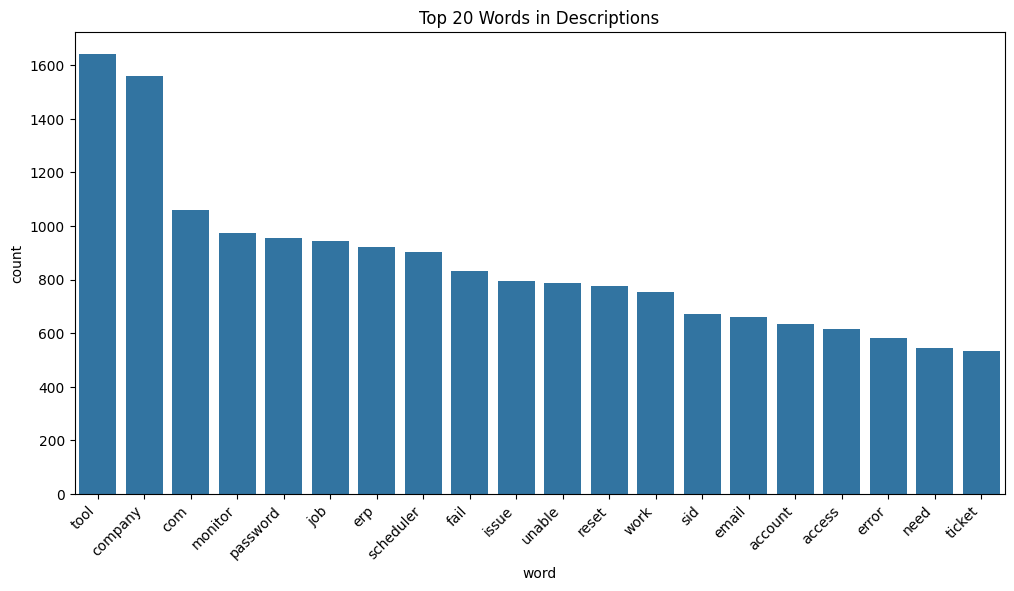

In [ ]:
all_descriptions = ' '.join(df1_final['description'].tolist())
words = all_descriptions.split()
word_counts = Counter(words)
top_20_words = word_counts.most_common(20)

top_words_df = pd.DataFrame(top_20_words, columns=['word', 'count'])

plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words_df)
plt.xticks(rotation=45, ha='right')
plt.title('Top 20 Words in Descriptions')
plt.show()


In [ ]:
from wordcloud import WordCloud

In [ ]:
def top_words(group):
  word_counts = Counter()
  for tokens in group['description']:
    word_counts.update(tokens.split())
  return [word for word, count in word_counts.most_common(10)]

top_words_df = df1_final.groupby('assignment_group').apply(top_words).reset_index(name='top_words')
top_words_df

assignment_group                                          top_words
0             GRP_0  [password, erp, unable, reset, account, issue,...
1            GRP_10  [tool, company, job, com, scheduler, monitor, ...
2            GRP_12  [hostname, server, access, drive, disk, file, ...
3            GRP_13  [tool, order, inwarehouse, erp, customer, issu...
4            GRP_14  [hostname, erp, server, sid, error, issue, pro...
5            GRP_19  [laptop, work, issue, unable, system, need, pc...
6             GRP_2  [access, sid, system, erp, need, ticket, tool,...
7            GRP_24  [problem, setup, new, ws, ewew, computer, defe...
8            GRP_25  [tool, engineering, eu, error, system, work, i...
9             GRP_3  [need, pc, issue, work, laptop, computer, conn...
10           GRP_33  [printer, pc, defective, work, phone, germany,...
11            GRP_4  [company, network, usa, access, work, contact,...
12            GRP_5  [job, tool, scheduler, monitor, company, com, ...
13            GRP_6  [company, tool, com, job, scheduler, monitor, ...
14            GRP_8  [company, com, tool, job, monitor, scheduler, ...
15            GRP_9  [tool, company, job, com, scheduler, monitor, ...

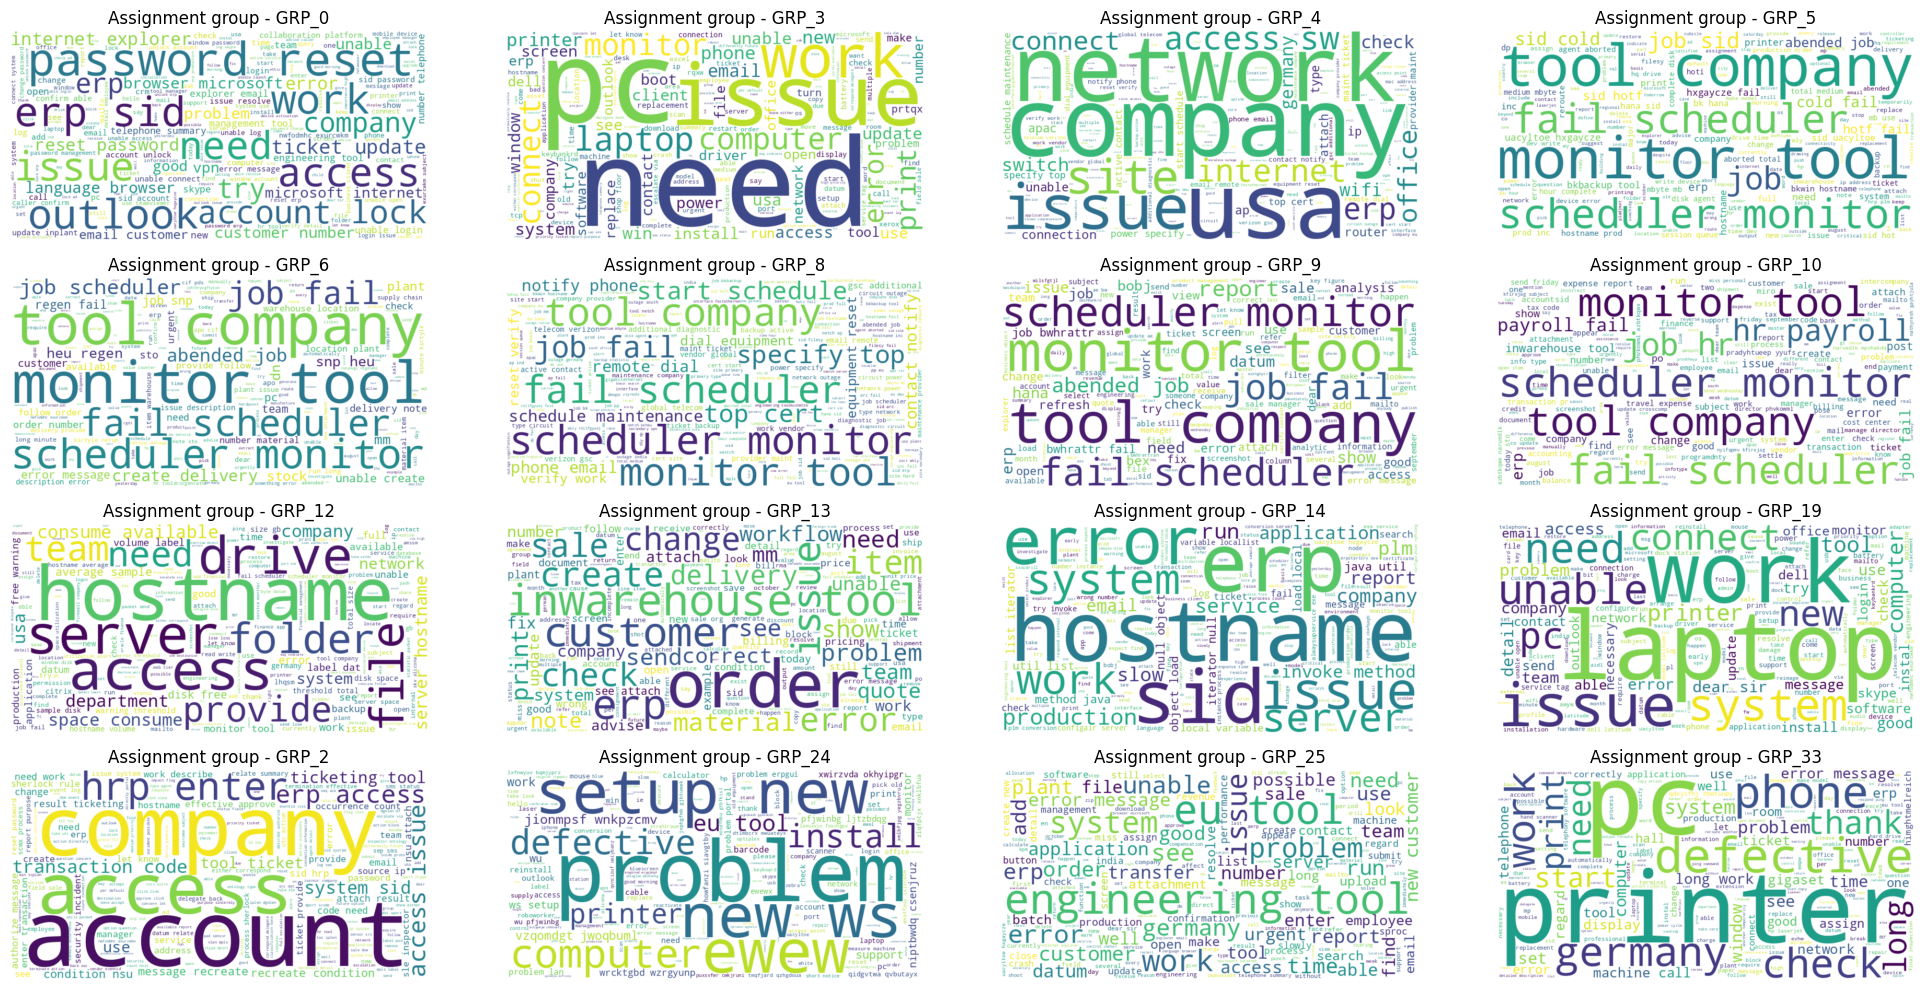

In [ ]:
groups = df1_final['assignment_group'].unique()

plt.figure(figsize=(20, 10))

for i, group in enumerate(groups):
  df_group = df1_final[df1_final['assignment_group'] == group]
  # Join all descriptions in the group into a single string
  text = ' '.join(df_group['description'].tolist())
  wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)  # Pass the combined string

  plt.subplot((len(groups) + 3) // 4, 4, i + 1)
  plt.title(f'Assignment group - {group}')
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
with open('df1_final.pickle', 'wb') as f:
  pickle.dump(df1_final, f)

# Feature Transformation & Initial Model Building:

### Splitting data into train and test sets

In [ ]:
X = df1_final.drop('assignment_group',axis = 1)
y = df1_final['assignment_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42,stratify = y)

In [ ]:
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

In [ ]:
train_df.shape

(6359, 3)

In [ ]:
test_df.shape

(707, 3)

In [ ]:
with open('train_df.pickle', 'wb') as f:
  pickle.dump(train_df, f)

with open('test_df.pickle', 'wb') as f:
  pickle.dump(test_df, f)

### Transforming text data using TF-IDF

In [ ]:
with open('train_df.pickle', 'rb') as f:
  train_df = pickle.load(f)
with open('test_df.pickle', 'rb') as f:
  test_df = pickle.load(f)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

     assignment_group  
6474            GRP_8  
44              GRP_0  
883            GRP_33  
2737            GRP_0  
3892            GRP_0

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(train_df['description'])
y = train_df['assignment_group']

In [ ]:
X

<6359x3707 sparse matrix of type '<class 'numpy.float64'>'
	with 72007 stored elements in Compressed Sparse Row format>

# Modeling Building and testing

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from imblearn.over_sampling import RandomOverSampler
import time

## Initial models training and evaluation

In [ ]:
def train_and_evaluate(X, y, model,model_name):
  results = []
  model_name = model_name
  model = model

  # Split Train data as train and validation sets
  X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

  # Handle class imbalance using RandomOverSampler
  oversampler = RandomOverSampler(random_state=42)

  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  start_time = time.time()
  with tqdm(total=1, desc="Training Model") as pbar:
    model.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)
  pred = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
  print(classification_report(y_eval, pred))
  return df_results

### Bayes MultinomialNB

In [ ]:
model_NB = MultinomialNB()

df1_output_NB = train_and_evaluate(X, y, model_NB,'MultinomialNB')

Training Model: 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

              precision    recall  f1-score   support

       GRP_0       0.94      0.73      0.82       708
      GRP_10       0.71      0.60      0.65        25
      GRP_12       0.60      0.74      0.66        46
      GRP_13       0.42      0.85      0.56        26
      GRP_14       0.35      0.62      0.45        21
      GRP_19       0.25      0.41      0.31        39
       GRP_2       0.47      0.65      0.54        43
      GRP_24       0.81      0.85      0.83        52
      GRP_25       0.38      0.67      0.48        21
       GRP_3       0.29      0.58      0.39        36
      GRP_33       0.38      0.63      0.47        19
       GRP_4       0.21      0.50      0.30        18
       GRP_5       0.41      0.70      0.52        23
       GRP_6       0.74      0.42      0.54        33
       GRP_8       0.91      0.34      0.49       116
       GRP_9       0.35      0.72      0.47        46

    accuracy                           0.67      1272
   macro avg       0.51   

In [ ]:
df1_output_NB

Model  Accuracy  Precision    Recall  F1_Score  \
0  MultinomialNB  0.665094   0.774991  0.665094  0.689727   

   Training Time(in seconds)  
0                   0.961696

### OneVsOne-LogisticRegression Classifier

In [ ]:
model_OVOLR = OneVsOneClassifier(LogisticRegression(max_iter=1000))

df1_output_OVOLR = train_and_evaluate(X, y, model_OVOLR,'OneVsOne_LogisticRegression')
print(df1_output_OVOLR)

Training Model: 100%|██████████| 1/1 [02:27<00:00, 147.76s/it]

              precision    recall  f1-score   support

       GRP_0       0.91      0.82      0.86       708
      GRP_10       0.76      0.64      0.70        25
      GRP_12       0.69      0.80      0.74        46
      GRP_13       0.61      0.73      0.67        26
      GRP_14       0.52      0.52      0.52        21
      GRP_19       0.29      0.46      0.35        39
       GRP_2       0.50      0.65      0.57        43
      GRP_24       0.79      0.85      0.81        52
      GRP_25       0.45      0.62      0.52        21
       GRP_3       0.36      0.61      0.45        36
      GRP_33       0.58      0.58      0.58        19
       GRP_4       0.23      0.28      0.25        18
       GRP_5       0.48      0.61      0.54        23
       GRP_6       0.82      0.42      0.56        33
       GRP_8       0.88      0.45      0.59       116
       GRP_9       0.37      0.78      0.50        46

    accuracy                           0.72      1272
   macro avg       0.58   

### RandomForest Classifier

In [ ]:
model_RF = RandomForestClassifier()
df1_output_RF = train_and_evaluate(X,y, model_RF,'RandomForestClassifier')
df1_output_RF

Training Model: 100%|██████████| 1/1 [02:01<00:00, 121.32s/it]


              precision    recall  f1-score   support

       GRP_0       0.79      0.94      0.86       708
      GRP_10       0.92      0.44      0.59        25
      GRP_12       0.61      0.59      0.60        46
      GRP_13       0.73      0.42      0.54        26
      GRP_14       0.88      0.33      0.48        21
      GRP_19       0.40      0.21      0.27        39
       GRP_2       0.79      0.44      0.57        43
      GRP_24       0.84      0.83      0.83        52
      GRP_25       0.60      0.43      0.50        21
       GRP_3       0.35      0.19      0.25        36
      GRP_33       0.62      0.26      0.37        19
       GRP_4       0.17      0.06      0.08        18
       GRP_5       0.54      0.61      0.57        23
       GRP_6       0.86      0.36      0.51        33
       GRP_8       0.86      0.49      0.63       116
       GRP_9       0.34      0.70      0.46        46

    accuracy                           0.73      1272
   macro avg       0.64   

Model  Accuracy  Precision    Recall  F1_Score  \
0  RandomForestClassifier  0.732704   0.735899  0.732704  0.711346   

   Training Time(in seconds)  
0                 121.481577

In [ ]:
df_all_models_tfidf = pd.concat([df1_output_NB,df1_output_OVOLR,df1_output_RF], ignore_index=True)
df_all_models_tfidf

Model  Accuracy  Precision    Recall  F1_Score  \
0                MultinomialNB  0.664308   0.774553  0.664308  0.688984   
1  OneVsOne_LogisticRegression  0.721698   0.777125  0.721698  0.734628   
2       RandomForestClassifier  0.732704   0.735899  0.732704  0.711346   

   Training Time(in seconds)  
0                   1.547835  
1                 147.889016  
2                 121.481577

In [ ]:
#from sklearn.svm import SVC

#model_SVC = SVC(probability=True)
#df1_output_SVC = train_and_evaluate(X,y, model_SVC,'SVC')
#df1_output_SVC

Training Model:   0%|          | 0/1 [00:00<?, ?it/s]

SVC is taking more time to train. More than 32 minutes

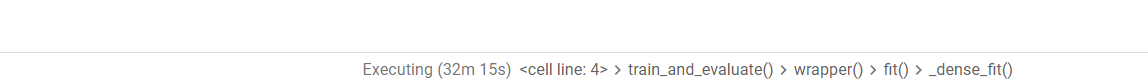

### Applying PCA technique on the data and SVC model

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
def train_and_evaluate(X, y, model,model_name):
  results = []
  model_name = model_name
  model = model

  X_train, X_eval, y_train, y_eval = train_test_split(X,y, test_size=0.2, random_state=42,stratify = y)

  oversampler = RandomOverSampler(random_state=42)

  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  # Applying PCA
  pca = PCA(n_components=0.95)  # Keep 95% of variance
  X_train_resampled = pca.fit_transform(X_train_resampled)
  X_eval = pca.transform(X_eval.toarray())

  start_time = time.time()
  with tqdm(total=1, desc="Training Model") as pbar:
    model.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)
  pred = model.predict(X_eval)
  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
  print(classification_report(y_eval, pred))
  return df_results

In [ ]:
model_SVC = OneVsOneClassifier(SVC(probability=True))
df1_output_SVC = train_and_evaluate(X_train, y_train, model_SVC,'SVC_OVO')
print(df1_output_SVC)

feature count after performing PCA (45312, 913)


Training Model: 100%|██████████| 1/1 [14:35<00:00, 875.80s/it]


              precision    recall  f1-score   support

       GRP_0       0.74      0.95      0.83       708
      GRP_10       0.91      0.40      0.56        25
      GRP_12       0.71      0.48      0.57        46
      GRP_13       0.80      0.15      0.26        26
      GRP_14       0.62      0.24      0.34        21
      GRP_19       0.44      0.18      0.25        39
       GRP_2       0.74      0.47      0.57        43
      GRP_24       0.87      0.75      0.80        52
      GRP_25       0.44      0.19      0.27        21
       GRP_3       0.33      0.08      0.13        36
      GRP_33       0.60      0.16      0.25        19
       GRP_4       0.00      0.00      0.00        18
       GRP_5       0.56      0.61      0.58        23
       GRP_6       0.93      0.39      0.55        33
       GRP_8       0.86      0.53      0.65       116
       GRP_9       0.34      0.70      0.46        46

    accuracy                           0.71      1272
   macro avg       0.62   

In [ ]:
df1_output_SVC

Model  Accuracy  Precision    Recall  F1_Score  Training Time(in seconds)
0  SVC_OVO  0.713836    0.70889  0.713836  0.679455                 965.138031

# Feature Transformation

In [ ]:
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## Hypothesis testing on Text-length

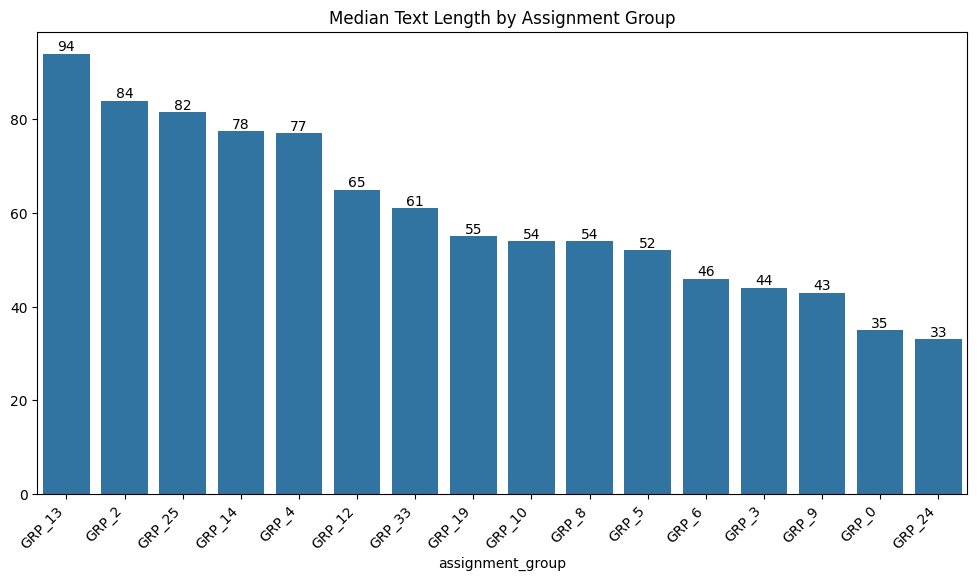

In [ ]:
df1_final['text_length'] = df1_final['description'].apply(len)
median_text_length = df1_final.groupby('assignment_group')['text_length'].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=median_text_length.index, y=median_text_length.values)
plt.xticks(rotation=45, ha='right')
plt.title('Median Text Length by Assignment Group')

for i, v in enumerate(median_text_length.values):
  ax.text(i, v, f'{v:.0f}', ha='center', va='bottom')

plt.show()


Testing of Hypothesis:
- Null Hypothesis: The is no significant difference between the groups
- Alternative Hypothesis: There is a significant difference between the groups



In [ ]:
# Performing a one-way ANOVA test
f_statistic, p_value = stats.f_oneway(*[df1_final['text_length'][df1_final['assignment_group'] == group] for group in df1_final['assignment_group'].unique()])

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Checking if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
  print("There is a significant difference in text length between assignment groups.")
else:
  print("There is no significant difference in text length between assignment groups.")


F-statistic: 42.61793276910973
P-value: 7.885097740072651e-121
There is a significant difference in text length between assignment groups.


In [ ]:
# Performing Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(df1_final['text_length'], df1_final['assignment_group'], alpha=0.05)

print(tukey_result)

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
 GRP_0 GRP_10    26.221 0.2419   -5.3285   57.7706  False
 GRP_0 GRP_12   41.1589    0.0   17.5411   64.7767   True
 GRP_0 GRP_13   60.3385    0.0   29.3187   91.3584   True
 GRP_0 GRP_14   51.6587    0.0   17.3866   85.9308   True
 GRP_0 GRP_19   18.0096 0.5457   -7.6825   43.7017  False
 GRP_0  GRP_2  154.4755    0.0  130.1329  178.8181   True
 GRP_0 GRP_24  -23.0525 0.0381   -45.555   -0.5501   True
 GRP_0 GRP_25   40.6126 0.0058    6.0549   75.1704   True
 GRP_0  GRP_3   30.0732 0.0104    3.4832   56.6631   True
 GRP_0 GRP_33   25.0805  0.554  -10.8613   61.0223  False
 GRP_0  GRP_4   44.3982 0.0044    7.2519   81.5444   True
 GRP_0  GRP_5   12.7891 0.9948  -20.1576   45.7358  False
 GRP_0  GRP_6    7.9375 0.9998  -19.8029   35.6778  False
 GRP_0  GRP_8   41.1475    0.0   25.5645   56.7306   True
 GRP_0  GRP_9 

Blue dots: Indicate significant differences in text length between the two groups.

Red dots: Indicate non-significant differences in text length between the two groups

Error Bars: The error bars represent the confidence intervals for the mean differences. If the error bars of two groups do not overlap, it suggests a significant difference between the groups.

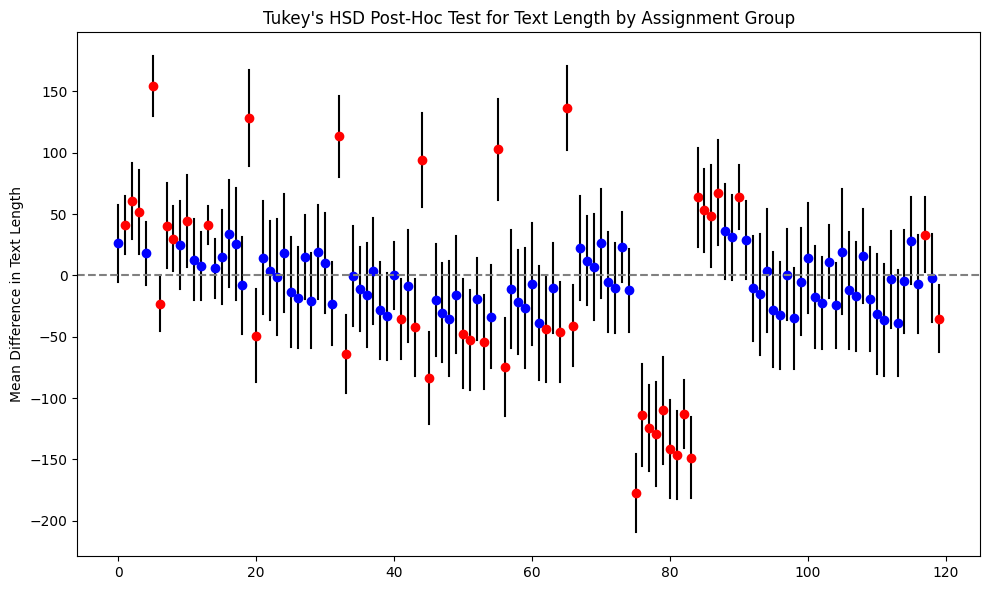

In [ ]:
groups = tukey_result.groupsunique
meandiffs = tukey_result.meandiffs
confint = tukey_result.confint
lower = confint[:,0]
upper = confint[:,1]
reject = tukey_result.reject

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the confidence intervals
for i in range(len(meandiffs)):
  ax.plot([i, i], [lower[i], upper[i]], color='black')
  ax.plot(i, meandiffs[i], 'o', color='red' if reject[i] else 'blue')

ax.set_ylabel('Mean Difference in Text Length')
ax.set_title("Tukey's HSD Post-Hoc Test for Text Length by Assignment Group")
ax.axhline(y=0, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

 Observation: It seems that the text length across the assignment groups is not uniformly distributed. This is suggested by the observed differences in error bars, indicating that the variability in text length between groups is statistically significant. Therefore, we can consider incorporating text length as a potential feature in our model to account for this variation.



# More on Logistic Regression

## Hyper-Parameter Tuning on Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import PCA

In [ ]:
model_OVOLR  =  OneVsOneClassifier(LogisticRegression(max_iter=1000))

In [ ]:
LogisticRegression(max_iter=1000).get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
model_OVOLR

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1000))

In [ ]:
def train_and_evaluate_with_tuning(X, y, model, model_name):
  results = []
  model_name = model_name
  model = model

  X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  oversampler = RandomOverSampler(random_state=42)
  X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train.toarray(), y_train)

  # Applying PCA
  pca = PCA(n_components=0.95)  # Keep 95% of variance
  X_train_resampled = pca.fit_transform(X_train_resampled)
  X_eval = pca.transform(X_eval.toarray())

  # Hyperparameter tuning for Logistic Regression (C)
  param_grid = {'estimator__C': [0.01, 0.1, 1, 10, 100]}
  grid_search = GridSearchCV(model, param_grid, cv=2, scoring='accuracy')

  start_time = time.time()
  with tqdm(total=1, desc="Training and Tuning Model") as pbar:
    grid_search.fit(X_train_resampled, y_train_resampled)
    pbar.update(1)

  best_model = grid_search.best_estimator_
  pred = best_model.predict(X_eval)

  accuracy = accuracy_score(y_eval, pred)
  precision = precision_score(y_eval, pred, average='weighted')
  recall = recall_score(y_eval, pred, average='weighted')
  f1 = f1_score(y_eval, pred, average='weighted')
  end_time = time.time()

  results.append([model_name, accuracy, precision, recall, f1, end_time - start_time, grid_search.best_params_])

  df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Training Time(in seconds)', 'Best Parameters'])
  print(classification_report(y_eval, pred))
  return df_results

model_OVOLR = OneVsOneClassifier(LogisticRegression(max_iter=1000))
df1_output_OVOLR_tuned = train_and_evaluate_with_tuning(X, y, model_OVOLR, 'OneVsOne_LogisticRegression_Tuned')
print(df1_output_OVOLR_tuned)


Training and Tuning Model: 100%|██████████| 1/1 [05:06<00:00, 306.87s/it]


              precision    recall  f1-score   support

       GRP_0       0.85      0.88      0.86       708
      GRP_10       0.76      0.64      0.70        25
      GRP_12       0.68      0.65      0.67        46
      GRP_13       0.65      0.65      0.65        26
      GRP_14       0.58      0.52      0.55        21
      GRP_19       0.32      0.36      0.34        39
       GRP_2       0.56      0.56      0.56        43
      GRP_24       0.82      0.88      0.85        52
      GRP_25       0.47      0.38      0.42        21
       GRP_3       0.46      0.50      0.48        36
      GRP_33       0.55      0.32      0.40        19
       GRP_4       0.07      0.06      0.06        18
       GRP_5       0.44      0.61      0.51        23
       GRP_6       0.83      0.45      0.59        33
       GRP_8       0.86      0.44      0.58       116
       GRP_9       0.36      0.76      0.49        46

    accuracy                           0.73      1272
   macro avg       0.58   

In [ ]:
df1_output_OVOLR_tuned

Model  Accuracy  Precision   Recall  F1_Score  \
0  OneVsOne_LogisticRegression_Tuned   0.72956   0.749118  0.72956  0.727823   

   Training Time(in seconds)        Best Parameters  
0                 307.596447  {'estimator__C': 100}

In [ ]:
results_on_validation_data = pd.DataFrame({
    'Model': ['OneVsOne_LogisticRegression_Tuned+ROS'],
    'Accuracy': [0.72956],
    'Precision': [0.749118],
    'Recall': [0.72956],
    'F1_Score': [0.727823]
})

results_on_validation_data

Model  Accuracy  Precision   Recall  \
0  OneVsOne_LogisticRegression_Tuned+ROS   0.72956   0.749118  0.72956   

   F1_Score  
0  0.727823

Observation: To address memory constraints, we employed Principal Component Analysis (PCA) on the dataset prior to conducting grid search cross-validation for logistic regression. While fine-tuning did yield some improvement, the overall accuracy gain was marginal.



## Additing Text Length as New Feature on Fine-Tuned model

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

     assignment_group  
6474            GRP_8  
44              GRP_0  
883            GRP_33  
2737            GRP_0  
3892            GRP_0

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(train_df.drop(['assignment_group'],axis = 1), train_df['assignment_group'], test_size=0.2, random_state=42, stratify=train_df['assignment_group'])

In [ ]:
text_length_values = X_train['text_length'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_text_length = scaler.fit_transform(text_length_values)

vectorize = TfidfVectorizer()
X_description = vectorize.fit_transform(X_train['description'])

X_description_dense = X_description.toarray()
X_description_dense = np.hstack((X_description_dense, scaled_text_length))

In [ ]:
eval_text_lenght_scaled = scaler.transform(X_eval['text_length'].values.reshape(-1, 1))
eval_description = vectorize.transform(X_eval['description'])
eval_description_dense = eval_description.toarray()
eval_description_dense = np.hstack((eval_description_dense, eval_text_lenght_scaled))

In [ ]:
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_description_dense, y_train)

OVO_LR_tuned= OneVsOneClassifier(LogisticRegression(max_iter=1000,C = 100))

start_time = time.time()
OVO_LR_tuned.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

pred = OVO_LR_tuned.predict(eval_description_dense)
accuracy = accuracy_score(y_eval, pred)
precision = precision_score(y_eval, pred, average='weighted')
recall = recall_score(y_eval, pred, average='weighted')
f1 = f1_score(y_eval, pred, average='weighted')

results = []
results.append([OVO_LR_tuned, accuracy, precision, recall, f1, end_time - start_time])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score','Training Time(in seconds)'])
print(classification_report(y_eval, pred))

              precision    recall  f1-score   support

       GRP_0       0.86      0.89      0.88       708
      GRP_10       0.80      0.64      0.71        25
      GRP_12       0.73      0.70      0.71        46
      GRP_13       0.67      0.69      0.68        26
      GRP_14       0.56      0.48      0.51        21
      GRP_19       0.32      0.36      0.34        39
       GRP_2       0.60      0.58      0.59        43
      GRP_24       0.82      0.88      0.85        52
      GRP_25       0.64      0.43      0.51        21
       GRP_3       0.47      0.56      0.51        36
      GRP_33       0.50      0.37      0.42        19
       GRP_4       0.19      0.17      0.18        18
       GRP_5       0.48      0.61      0.54        23
       GRP_6       0.83      0.45      0.59        33
       GRP_8       0.85      0.43      0.57       116
       GRP_9       0.39      0.85      0.53        46

    accuracy                           0.74      1272
   macro avg       0.61   

In [ ]:
df_results

Model  Accuracy  Precision  \
0  OneVsOneClassifier(estimator=LogisticRegressio...  0.743711   0.764584   

     Recall  F1_Score  Training Time(in seconds)  
0  0.743711  0.742221                 265.486296

In [ ]:
results_on_validation_data.loc[1] = ['OneVsOne_LogisticRegression_Tuned+New_Feature+ROS',0.743711,0.764584,0.743711,0.742221]

In [ ]:
results_on_validation_data.loc[1:]

Model  Accuracy  Precision  \
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   

     Recall  F1_Score  
1  0.743711  0.742221

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221

After incorporating the additional feature of text length and fine-tuning the model's parameters, we observed a significant improvement in all key metrics (precision, recall, F1-score, accuracy) of the OVO-logistic regression model.

## Handling Class Imbalance using SMOTE Technique

Performing LabelEncoding on the Target variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

In [ ]:
le = LabelEncoder()
train_df['assignment_group'] = le.fit_transform(train_df['assignment_group'])
le.classes_

array(['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_19', 'GRP_2',
       'GRP_24', 'GRP_25', 'GRP_3', 'GRP_33', 'GRP_4', 'GRP_5', 'GRP_6',
       'GRP_8', 'GRP_9'], dtype=object)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

      assignment_group  
6474                14  
44                   0  
883                 10  
2737                 0  
3892                 0

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(train_df.drop(['assignment_group'],axis = 1), train_df['assignment_group'], test_size=0.2, random_state=42, stratify=train_df['assignment_group'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

text_length_values = X_train['text_length'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_text_length = scaler.fit_transform(text_length_values)

vectorize = TfidfVectorizer()
X_description = vectorize.fit_transform(X_train['description'])

X_description_dense = X_description.toarray()
X_description_dense = np.hstack((X_description_dense, scaled_text_length))

eval_text_lenght_scaled = scaler.transform(X_eval['text_length'].values.reshape(-1, 1))
eval_description = vectorize.transform(X_eval['description'])
eval_description_dense = eval_description.toarray()
eval_description_dense = np.hstack((eval_description_dense, eval_text_lenght_scaled))

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_description_dense, y_train)

OVO_LR_tuned= OneVsOneClassifier(LogisticRegression(max_iter=1000,C = 100))

start_time = time.time()
OVO_LR_tuned.fit(X_train_resampled, y_train_resampled)
end_time = time.time()

pred = OVO_LR_tuned.predict(eval_description_dense)
accuracy = accuracy_score(y_eval, pred)
precision = precision_score(y_eval, pred, average='weighted')
recall = recall_score(y_eval, pred, average='weighted')
f1 = f1_score(y_eval, pred, average='weighted')

results = []
results.append([OVO_LR_tuned, accuracy, precision, recall, f1])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy','Precision','Recall','F1_Score'])
print(classification_report(y_eval, pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       708
           1       0.77      0.68      0.72        25
           2       0.65      0.65      0.65        46
           3       0.64      0.69      0.67        26
           4       0.53      0.43      0.47        21
           5       0.36      0.38      0.37        39
           6       0.62      0.58      0.60        43
           7       0.87      0.88      0.88        52
           8       0.56      0.48      0.51        21
           9       0.53      0.53      0.53        36
          10       0.59      0.53      0.56        19
          11       0.25      0.17      0.20        18
          12       0.48      0.61      0.54        23
          13       0.81      0.39      0.53        33
          14       0.88      0.48      0.62       116
          15       0.38      0.83      0.52        46

    accuracy                           0.75      1272
   macro avg       0.61   

In [ ]:
df_results

Model  Accuracy  Precision  \
0  OneVsOneClassifier(estimator=LogisticRegressio...      0.75   0.767796   

   Recall  F1_Score  
0    0.75  0.748193

In [ ]:
results_on_validation_data.loc[2] = ['OneVsOne_LogisticRegression_Tuned+New_Feature+SMOTE',0.75,0.767796,0.75,0.748193]

In [ ]:
results_on_validation_data.loc[2:]

Model  Accuracy  Precision  \
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...      0.75   0.767796   

   Recall  F1_Score  
2    0.75  0.748193

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221  
2  0.750000  0.748193

## Additing Augmented Data to address Class Imbalance

### Using NLPAug Package

In [ ]:
!pip install nlpaug -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
from nlpaug.augmenter.word import SynonymAug
from sklearn.utils import shuffle

In [ ]:
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [ ]:
import pickle
with open('train_df.pickle', 'rb') as f:
   train_df = pickle.load(f)
with open('test_df.pickle', 'rb') as f:
   test_df = pickle.load(f)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

     assignment_group  
6474            GRP_8  
44              GRP_0  
883            GRP_33  
2737            GRP_0  
3892            GRP_0

In [ ]:
le = LabelEncoder()
train_df['assignment_group'] = le.fit_transform(train_df['assignment_group'])

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(train_df.drop(['assignment_group'],axis = 1), train_df['assignment_group'], test_size=0.2, random_state=42, stratify=train_df['assignment_group'])

In [ ]:
aug = SynonymAug(aug_src='wordnet')
# Number of augmented samples to create per original sample
augmentation_factor = 3

X_augmented = []
y_augmented = []


for i in tqdm(range(len(X_train))):
    description = X_train.iloc[i]['description']
    label = y_train.iloc[i]

    # Augment only if the label is not the majority class (0)
    if label != 0:
        augmented_descriptions = aug.augment(description, n=augmentation_factor)
        for augmented_description in augmented_descriptions:
            X_augmented.append({
                'description': augmented_description,
                'text_length': X_train.iloc[i]['text_length']
            })
            y_augmented.append(label)

augmented_df = pd.DataFrame(X_augmented)
augmented_df['assignment_group'] = y_augmented

train_df_augmented = pd.concat([X_train, augmented_df], ignore_index=True)
y_train_augmented = pd.concat([y_train, pd.Series(y_augmented)], ignore_index=True)

train_df_augmented, y_train_augmented = shuffle(train_df_augmented, y_train_augmented, random_state=42)

text_length_values = train_df_augmented['text_length'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_text_length = scaler.fit_transform(text_length_values)

vectorize = TfidfVectorizer()
X_description = vectorize.fit_transform(train_df_augmented['description'])

X_description_dense = X_description.toarray()
X_description_dense = np.hstack((X_description_dense, scaled_text_length))

eval_text_length_scaled = scaler.transform(X_eval['text_length'].values.reshape(-1, 1))
eval_description = vectorize.transform(X_eval['description'])
eval_description_dense = eval_description.toarray()
eval_description_dense = np.hstack((eval_description_dense, eval_text_length_scaled))

OVO_LR_tuned = OneVsOneClassifier(LogisticRegression(max_iter=1000, C=100))

start_time = time.time()
OVO_LR_tuned.fit(X_description_dense, y_train_augmented)
end_time = time.time()

pred = OVO_LR_tuned.predict(eval_description_dense)

accuracy = accuracy_score(y_eval, pred)
precision = precision_score(y_eval, pred, average='weighted')
recall = recall_score(y_eval, pred, average='weighted')
f1 = f1_score(y_eval, pred, average='weighted')

results = []
results.append([OVO_LR_tuned, accuracy, precision, recall, f1, end_time - start_time])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Training Time(in seconds)'])
print(classification_report(y_eval, pred))
print(df_results)

100%|██████████| 5087/5087 [00:25<00:00, 199.07it/s]


              precision    recall  f1-score   support

           0       0.86      0.93      0.89       708
           1       0.89      0.64      0.74        25
           2       0.68      0.70      0.69        46
           3       0.59      0.65      0.62        26
           4       0.89      0.38      0.53        21
           5       0.48      0.41      0.44        39
           6       0.61      0.53      0.57        43
           7       0.81      0.88      0.84        52
           8       0.69      0.43      0.53        21
           9       0.59      0.53      0.56        36
          10       0.69      0.47      0.56        19
          11       0.12      0.06      0.08        18
          12       0.69      0.48      0.56        23
          13       0.78      0.42      0.55        33
          14       0.59      0.80      0.68       116
          15       0.52      0.26      0.35        46

    accuracy                           0.77      1272
   macro avg       0.66   

In [ ]:
df_results

Model  Accuracy  Precision  \
0  OneVsOneClassifier(estimator=LogisticRegressio...  0.772799   0.763446   

     Recall  F1_Score  Training Time(in seconds)  
0  0.772799  0.759359                  48.379683

In [ ]:
results_on_validation_data.loc[3] = ['OneVsOne_LogisticRegression+New_Feature+NLPAug',0.772799,0.763446,0.772799,0.759359]

In [ ]:
results_on_validation_data.loc[3:]

Model  Accuracy  Precision  \
3  OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   

     Recall  F1_Score  
3  0.772799  0.759359

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   
3     OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221  
2  0.750000  0.748193  
3  0.772799  0.759359

#### Testing on Unseen Data

In [ ]:
with open('test_df.pickle', 'rb') as f:
   test_df = pickle.load(f)

test_text_lenght_scaled = scaler.transform(test_df['text_length'].values.reshape(-1, 1))
test_description = vectorize.transform(test_df['description'])
test_df['assignment_group'] = le.transform(test_df['assignment_group'])
test_description_dense = test_description.toarray()
test_description_dense = np.hstack((test_description_dense, test_text_lenght_scaled))

pred = OVO_LR_tuned.predict(test_description_dense)
print('Accuracy',accuracy_score(pred,test_df['assignment_group']))
print('Precision',precision_score(pred,test_df['assignment_group'],average = 'weighted'))
print('Recall',recall_score(pred,test_df['assignment_group'],average = 'weighted'))
print('F1-Score',f1_score(pred,test_df['assignment_group'],average = 'weighted'))
print(classification_report(pred,test_df['assignment_group']))

Accuracy 0.7652050919377652
Precision 0.8156244905582924
Recall 0.7652050919377652
F1-Score 0.7818480267125477
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       434
           1       0.50      0.88      0.64         8
           2       0.62      0.64      0.63        25
           3       1.00      0.74      0.85        19
           4       0.42      1.00      0.59         5
           5       0.38      0.36      0.37        22
           6       0.46      0.58      0.51        19
           7       0.82      0.85      0.84        27
           8       0.50      0.86      0.63         7
           9       0.20      0.27      0.23        15
          10       0.45      1.00      0.62         5
          11       0.10      0.33      0.15         3
          12       0.38      0.71      0.50         7
          13       0.28      0.62      0.38         8
          14       0.80      0.60      0.68        87
          15       0.36 

Since the results have improved, let's save the preprocessing steps and the model as pickle files.

In [ ]:
#saving Augmented and evaluation data as pickle files
with open('train_df_augmented.pickle', 'wb') as f:
   pickle.dump(train_df_augmented, f)
with open('y_train_augmented.pickle', 'wb') as f:
   pickle.dump(y_train_augmented, f)
with open('X_eval.pickle', 'wb') as f:
   pickle.dump(X_eval, f)
with open('y_eval.pickle', 'wb') as f:
   pickle.dump(y_eval, f)

In [ ]:
import joblib

In [ ]:
joblib.dump(le,'LabelEncoder.pkl')
joblib.dump(scaler,'MinMaxScaler.pkl')
joblib.dump(vectorize,'TfidfVectorizer.pkl')
joblib.dump(OVO_LR_tuned,'OVO_LR_model.pkl')

['OVO_LR_model.pkl']

### BERT-based augmentation

In [ ]:
import tensorflow as tf
from transformers import BertTokenizer, TFBertForMaskedLM
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import random
from tqdm import tqdm
import pickle
from sklearn.model_selection import train_test_split

In [ ]:
with open('train_df.pickle', 'rb') as f:
   train_df = pickle.load(f)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

     assignment_group  
6474            GRP_8  
44              GRP_0  
883            GRP_33  
2737            GRP_0  
3892            GRP_0

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_df['assignment_group'] = le.fit_transform(train_df['assignment_group'])

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(train_df.drop(['assignment_group'],axis = 1), train_df['assignment_group'], test_size=0.2, random_state=42, stratify=train_df['assignment_group'])

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForMaskedLM.from_pretrained('bert-base-uncased')
model.trainable = False

# Function to perform BERT-based augmentation using TensorFlow
def augment_with_bert(sentence, num_augmentations=3):
    tokens = tokenizer.tokenize(sentence)
    if len(tokens) < 3:  # Skip too short sentences to avoid augmentation errors
        return [sentence]

    augmented_sentences = set()
    while len(augmented_sentences) < num_augmentations:
        masked_index = random.randint(0, len(tokens) - 1)
        original_token = tokens[masked_index]

        tokens[masked_index] = '[MASK]'
        masked_sentence = tokenizer.convert_tokens_to_string(tokens)
        input_ids = tokenizer.encode(masked_sentence, return_tensors='tf')

        predictions = model(input_ids).logits

        predicted_ids = tf.math.top_k(predictions[0, masked_index + 1], k=5).indices.numpy()
        predicted_tokens = [tokenizer.decode([id]).strip() for id in predicted_ids]

        for predicted_token in predicted_tokens:
            new_tokens = tokens[:]
            new_tokens[masked_index] = predicted_token
            augmented_sentence = tokenizer.convert_tokens_to_string(new_tokens)
            augmented_sentences.add(augmented_sentence)

        tokens[masked_index] = original_token

    return list(augmented_sentences)[:num_augmentations]

augmentation_factor = 3

X_augmented = []
y_augmented = []

for i in tqdm(range(len(X_train))):
    description = X_train.iloc[i]['description']
    label = y_train.iloc[i]

    if label != 0:
        augmented_descriptions = augment_with_bert(description, num_augmentations=augmentation_factor)
        for augmented_description in augmented_descriptions:
            X_augmented.append({
                'description': augmented_description,
                'text_length': X_train.iloc[i]['text_length']
            })
            y_augmented.append(label)

augmented_df = pd.DataFrame(X_augmented)
augmented_df['assignment_group'] = y_augmented

train_df_augmented = pd.concat([X_train, augmented_df], ignore_index=True)
y_train_augmented = pd.concat([y_train, pd.Series(y_augmented)], ignore_index=True)

train_df_augmented, y_train_augmented = shuffle(train_df_augmented, y_train_augmented, random_state=42)

In [ ]:
text_length_values = train_df_augmented['text_length'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_text_length = scaler.fit_transform(text_length_values)

vectorize = TfidfVectorizer()
X_description = vectorize.fit_transform(train_df_augmented['description'])

X_description_dense = X_description.toarray()
X_description_dense = np.hstack((X_description_dense, scaled_text_length))

eval_text_length_scaled = scaler.transform(X_eval['text_length'].values.reshape(-1, 1))
eval_description = vectorize.transform(X_eval['description'])
eval_description_dense = eval_description.toarray()
eval_description_dense = np.hstack((eval_description_dense, eval_text_length_scaled))

OVO_LR_tuned = OneVsOneClassifier(LogisticRegression(max_iter=1000, C=100))

start_time = time.time()
OVO_LR_tuned.fit(X_description_dense, y_train_augmented)
end_time = time.time()

pred = OVO_LR_tuned.predict(eval_description_dense)

accuracy = accuracy_score(y_eval, pred)
precision = precision_score(y_eval, pred, average='weighted')
recall = recall_score(y_eval, pred, average='weighted')
f1 = f1_score(y_eval, pred, average='weighted')

results = []
results.append([OVO_LR_tuned, accuracy, precision, recall, f1, end_time - start_time])

df_results = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score', 'Training Time(in seconds)'])
print(classification_report(y_eval, pred))
df_results

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       708
           1       0.82      0.56      0.67        25
           2       0.71      0.70      0.70        46
           3       0.62      0.62      0.62        26
           4       0.60      0.29      0.39        21
           5       0.36      0.31      0.33        39
           6       0.70      0.53      0.61        43
           7       0.77      0.90      0.83        52
           8       0.78      0.33      0.47        21
           9       0.53      0.53      0.53        36
          10       0.46      0.32      0.38        19
          11       0.25      0.11      0.15        18
          12       0.79      0.48      0.59        23
          13       0.82      0.42      0.56        33
          14       0.60      0.81      0.69       116
          15       0.48      0.24      0.32        46

    accuracy                           0.76      1272
   macro avg       0.63   

Model  Accuracy  Precision  \
0  OneVsOneClassifier(estimator=LogisticRegressio...  0.761006   0.748762   

     Recall  F1_Score  Training Time(in seconds)  
0  0.761006  0.744705                  49.055357

In [ ]:
results_on_validation_data.loc[4] = ['OneVsOne_LogisticRegression+New_Feature+BERT_Aug',0.761006,0.748762,0.761006,0.744705]

In [ ]:
results_on_validation_data.loc[4]

Model        OneVsOne_LogisticRegression+New_Feature+BERT_Aug
Accuracy                                             0.761006
Precision                                            0.748762
Recall                                               0.761006
F1_Score                                             0.744705
Name: 4, dtype: object

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   
3     OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   
4   OneVsOne_LogisticRegression+New_Feature+BERT_Aug  0.761006   0.748762   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221  
2  0.750000  0.748193  
3  0.772799  0.759359  
4  0.761006  0.744705

#### Testing on Unseen Data

In [ ]:
with open('test_df.pickle', 'rb') as f:
   test_df = pickle.load(f)

test_text_lenght_scaled = scaler.transform(test_df['text_length'].values.reshape(-1, 1))
test_description = vectorize.transform(test_df['description'])
test_df['assignment_group'] = le.transform(test_df['assignment_group'])
test_description_dense = test_description.toarray()
test_description_dense = np.hstack((test_description_dense, test_text_lenght_scaled))

pred = OVO_LR_tuned.predict(test_description_dense)
print('Accuracy',accuracy_score(pred,test_df['assignment_group']))
print('Precision',precision_score(pred,test_df['assignment_group'],average = 'weighted'))
print('Recall',recall_score(pred,test_df['assignment_group'],average = 'weighted'))
print('F1-Score',f1_score(pred,test_df['assignment_group'],average = 'weighted'))
print(classification_report(pred,test_df['assignment_group']))

Accuracy 0.7581329561527581
Precision 0.7852512683792344
Recall 0.7581329561527581
F1-Score 0.766824696353548
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       423
           1       0.50      0.88      0.64         8
           2       0.69      0.67      0.68        27
           3       0.93      0.87      0.90        15
           4       0.50      1.00      0.67         6
           5       0.48      0.40      0.43        25
           6       0.42      0.50      0.45        20
           7       0.79      0.92      0.85        24
           8       0.50      0.75      0.60         8
           9       0.25      0.25      0.25        20
          10       0.64      0.78      0.70         9
          11       0.20      0.50      0.29         4
          12       0.54      0.54      0.54        13
          13       0.33      0.60      0.43        10
          14       0.74      0.61      0.67        79
          15       0.36  

# Deep Learning Models with Embeddings

In [ ]:
with open('train_df.pickle', 'rb') as f:
   train_df = pickle.load(f)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

     assignment_group  
6474            GRP_8  
44              GRP_0  
883            GRP_33  
2737            GRP_0  
3892            GRP_0

Performing Label Encoding

In [ ]:
le = LabelEncoder()
train_df['assignment_group'] = le.fit_transform(train_df['assignment_group'])
le.classes_

array(['GRP_0', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_19', 'GRP_2',
       'GRP_24', 'GRP_25', 'GRP_3', 'GRP_33', 'GRP_4', 'GRP_5', 'GRP_6',
       'GRP_8', 'GRP_9'], dtype=object)

In [ ]:
train_df.head()

description  text_length  \
6474                              usa company com since           21   
44                 log hr tool etime single sign portal           36   
883   mr id eu tool work computer empw error message...           68   
2737                             need configure printer           22   
3892  office least next month need password reset email           49   

      assignment_group  
6474                14  
44                   0  
883                 10  
2737                 0  
3892                 0

In [ ]:
X = train_df.drop(['assignment_group','text_length'],axis = 1)
y = train_df['assignment_group']

## LSTM Models with Embeddings

Bidirectional LSTM: Since we're dealing with text sequences, using a Bidirectional(LSTM()) layer could improve performance by capturing dependencies in both directions.

### Bidirectional LSTM with Word2Vec Embeddings and Random Oversampling

In [ ]:
!pip install gensim -q

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from gensim.models import KeyedVectors
import gensim.downloader as api

In [ ]:
# Load pre-trained Word2Vec model
# This will download the Word2Vec Google News model and save it locally.
wv = api.load('word2vec-google-news-300')
wv.save('word2vec.wordvectors')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.5666 - loss: 1.3273 - val_accuracy: 0.6384 - val_loss: 1.1900
Epoch 2/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 95s 53ms/step - accuracy: 0.8304 - loss: 0.4947 - val_accuracy: 0.6564 - val_loss: 1.2599
Epoch 3/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 89s 58ms/step - accuracy: 0.8784 - loss: 0.3226 - val_accuracy: 0.6635 - val_loss: 1.5194
Epoch 4/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 64s 45ms/step - accuracy: 0.8960 - loss: 0.2779 - val_accuracy: 0.6918 - val_loss: 1.2924
Epoch 5/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.8989 - loss: 0.2699 - val_accuracy: 0.7091 - val_loss: 1.5265
Epoch 6/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 91s 51ms/step - accuracy: 0.8932 - loss: 0.2780 - val_accuracy: 0.7162 - val_loss: 1.5827
Epoch 7/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 73s 45ms/step - accuracy: 0.9106 - loss: 0.2349 - val_accuracy: 0.7123 - val_loss: 1.8083
Epoch 8/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9089 -

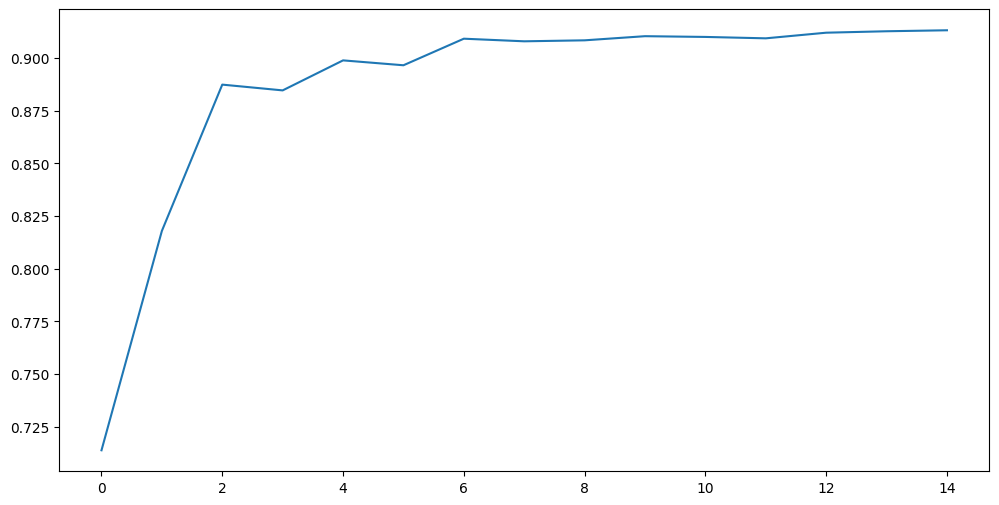

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X['description'])
word_index = tokenizer.word_index

# Convert descriptions to sequences
sequences = tokenizer.texts_to_sequences(X['description'])
# Pad sequences to ensure uniform length
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')
max_sequence_length = padded_sequences.shape[1]

target = y

X_train, X_eval, y_train, y_eval = train_test_split(
    padded_sequences, target, test_size=0.2, random_state=42, stratify=target
)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

embeddings_index = KeyedVectors.load("word2vec.wordvectors", mmap='r')

vocab_size = min(len(word_index) + 1, 5000)
embedding_dim = 300
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get_vector(word) if word in embeddings_index else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(units=256)),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(len(set(target)), activation='softmax')
])

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=15, validation_data=(X_eval, y_eval))

loss, accuracy = model.evaluate(X_eval, y_eval)
print(f"Test Accuracy: {accuracy:.2f}")

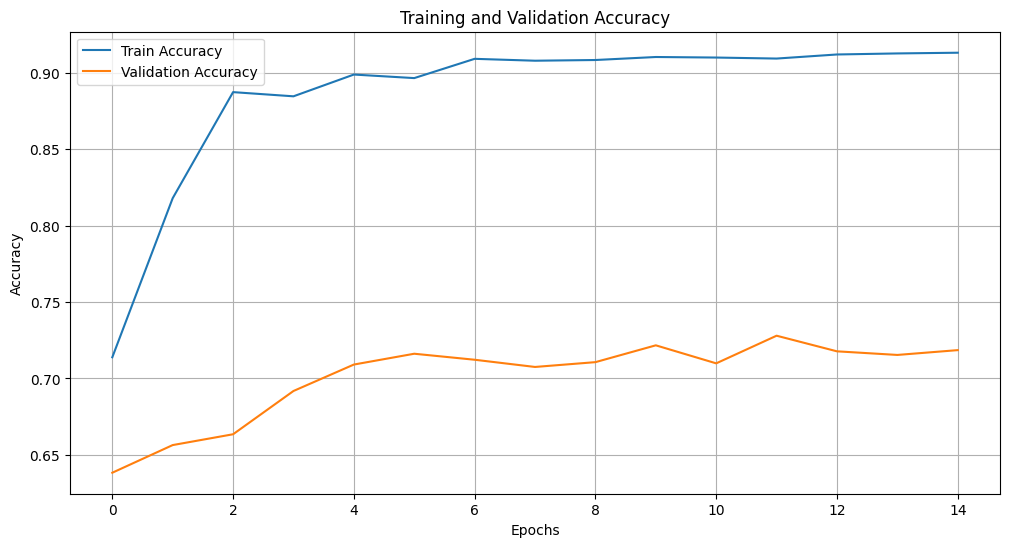

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ (32, 332, 300)              │       1,112,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ (32, 512)                   │       1,140,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (32, 512)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (32, 100)                   │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (32, 16)                    │           1,616 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,693,658 (17.90 MB)

 Trainable params: 1,193,652 (4.55 MB)

 Non-trainable params: 1,112,700 (4.24 MB)

 Optimizer params: 2,387,306 (9.11 MB)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

model.summary()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
Accuracy 0.7185534591194969
Precision 0.7395113536966181
Recall 0.7185534591194969
F1-Score 0.719316532311678
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       708
           1       0.77      0.40      0.53        25
           2       0.52      0.61      0.56        46
           3       0.68      0.50      0.58        26
           4       0.25      0.33      0.29        21
           5       0.48      0.41      0.44        39
           6       0.49      0.51      0.50        43
           7       0.66      0.79      0.72        52
           8       0.50      0.62      0.55        21
           9       0.41      0.36      0.38        36
          10       0.36      0.47      0.41        19
          11       0.20      0.06      0.09        18
          12       0.58      0.65      0.61        23
          13       0.67      0.36      0.47        33
          14       0.83      0.54      

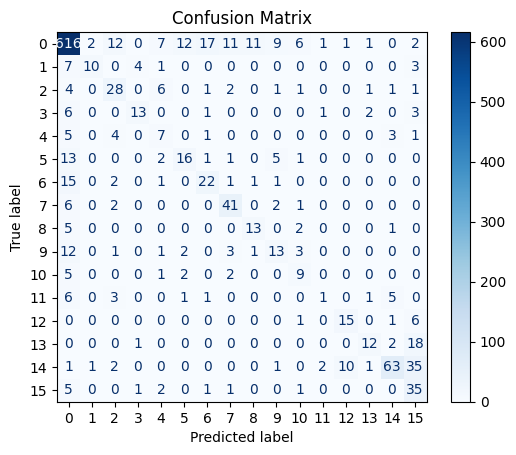

In [ ]:
y_pred = model.predict(X_eval).argmax(axis=1)

print('Accuracy',accuracy_score(y_eval, y_pred))
print('Precision',precision_score(y_eval, y_pred, average='weighted'))
print('Recall',recall_score(y_eval, y_pred, average='weighted'))
print('F1-Score',f1_score(y_eval, y_pred, average='weighted'))
# Print classification report
print(classification_report(y_eval, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Once the dataset is balanced, accuracy becomes a suitable metric for comparing performance. We observed improvements in the metrics of several classes, but there is an issue of overfitting. The model fits the training data too well and fails to capture general patterns, resulting in low testing accuracy compared to training accuracy in each epoch.

In [ ]:
results_on_validation_data.loc[5] = ['LSTM(Bi-directional)+Word2Vec(Pre-trained)+ROS',0.7185534591194969,0.7395113536966181,0.7185534591194969,0.719316532311678]

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   
3     OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   
4   OneVsOne_LogisticRegression+New_Feature+BERT_Aug  0.761006   0.748762   
5     LSTM(Bi-directional)+Word2Vec(Pre-trained)+ROS  0.718553   0.739511   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221  
2  0.750000  0.748193  
3  0.772799  0.759359  
4  0.761006  0.744705  
5  0.718553  0.719317

### Bidirectional LSTM with GloVe Embeddings and Random Oversampling

In [ ]:
# Load the GloVe model with 100 dimensions (much smaller than the 300-dimension Word2Vec)
wv = api.load('glove-wiki-gigaword-100')
wv.save('glove.wordvectors')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X['description'])
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X['description'])
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')
max_sequence_length = padded_sequences.shape[1]

target = y
X_train, X_eval, y_train, y_eval = train_test_split(padded_sequences, target, test_size=0.2, random_state=42, stratify=target)

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

embeddings_index = KeyedVectors.load("glove.wordvectors", mmap='r')

vocab_size = min(len(word_index) + 1, 5000)
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:
        embedding_vector = embeddings_index.get_vector(word) if word in embeddings_index else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(units=256)),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(len(set(target)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_resampled, y_resampled, epochs=15, validation_data=(X_eval, y_eval))

loss, accuracy = model.evaluate(X_eval, y_eval)
print(f"Test Accuracy: {accuracy:.2f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 59s 38ms/step - accuracy: 0.5436 - loss: 1.3871 - val_accuracy: 0.5291 - val_loss: 1.4436
Epoch 2/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.8613 - loss: 0.3824 - val_accuracy: 0.6588 - val_loss: 1.3755
Epoch 3/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.8716 - loss: 0.3575 - val_accuracy: 0.6211 - val_loss: 1.4297
Epoch 4/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.8935 - loss: 0.2789 - val_accuracy: 0.6785 - val_loss: 1.4604
Epoch 5/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9015 - loss: 0.2531 - val_accuracy: 0.6855 - val_loss: 1.5979
Epoch 6/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9044 - loss: 0.2445 - val_accuracy: 0.6918 - val_loss: 1.5583
Epoch 7/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9054 - loss: 0.2430 - val_accuracy: 0.7131 - val_loss: 1.6977
Epoch 8/15
1416/1416 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9063 -

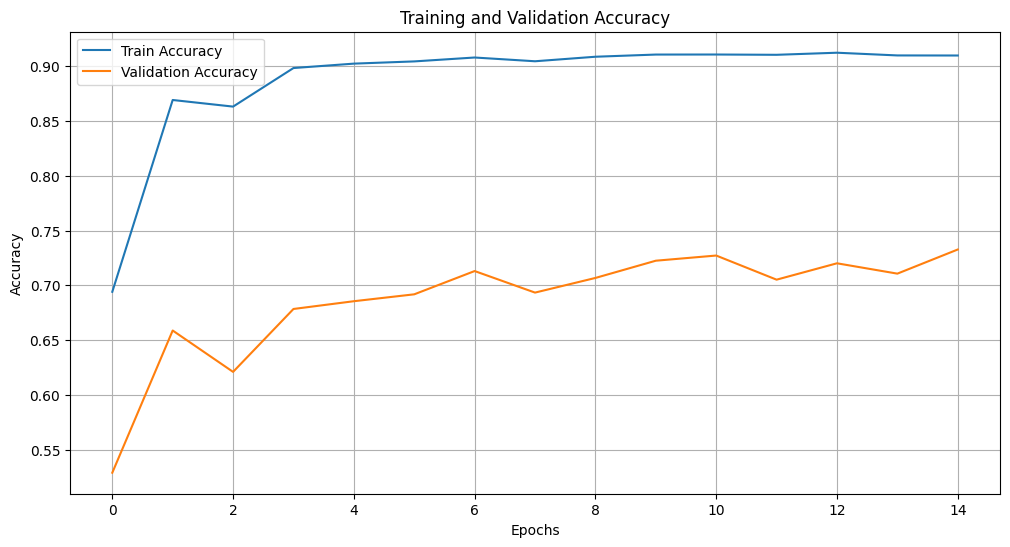

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)              │ (32, 332, 100)              │         370,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (32, 512)                   │         731,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (32, 512)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (32, 100)                   │          51,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (32, 16)                    │           1,616 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,723,058 (10.39 MB)

 Trainable params: 784,052 (2.99 MB)

 Non-trainable params: 370,900 (1.41 MB)

 Optimizer params: 1,568,106 (5.98 MB)

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

model.summary()

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
Accuracy 0.7327044025157232
Precision 0.7395971781121027
Recall 0.7327044025157232
F1-Score 0.7256847607265045
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       708
           1       0.83      0.60      0.70        25
           2       0.60      0.54      0.57        46
           3       0.53      0.38      0.44        26
           4       0.40      0.29      0.33        21
           5       0.60      0.38      0.47        39
           6       0.50      0.60      0.55        43
           7       0.78      0.77      0.78        52
           8       0.52      0.57      0.55        21
           9       0.41      0.33      0.37        36
          10       0.53      0.42      0.47        19
          11       0.20      0.11      0.14        18
          12       0.56      0.61      0.58        23
          13       0.75      0.36      0.49        33
          14       0.79      0.49     

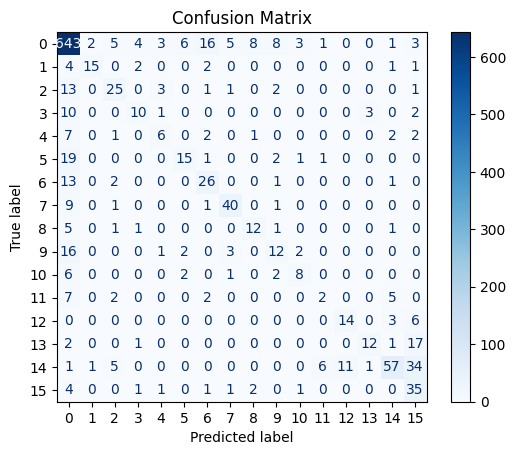

In [ ]:
y_pred = model.predict(X_eval).argmax(axis=1)

print('Accuracy',accuracy_score(y_eval, y_pred))
print('Precision',precision_score(y_eval, y_pred, average='weighted'))
print('Recall',recall_score(y_eval, y_pred, average='weighted'))
print('F1-Score',f1_score(y_eval, y_pred, average='weighted'))
# Print classification report
print(classification_report(y_eval, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
results_on_validation_data.loc[6] = ['LSTM(Bi-directional)+Glove(Pre-trained)+ROS',0.7327044025157232,0.7395971781121027,0.7327044025157232,0.7256847607265045]

In [ ]:
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   
3     OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   
4   OneVsOne_LogisticRegression+New_Feature+BERT_Aug  0.761006   0.748762   
5     LSTM(Bi-directional)+Word2Vec(Pre-trained)+ROS  0.718553   0.739511   
6        LSTM(Bi-directional)+Glove(Pre-trained)+ROS  0.732704   0.739597   

     Recall  F1_Score  
0  0.729560  0.727823  
1  0.743711  0.742221  
2  0.750000  0.748193  
3  0.772799  0.759359  
4  0.761006  0.744705  
5  0.718553  0.719317  
6  0.732704  0.725685

### GloVe Embeddings and BERT-Aug Data for Bidirectional LSTM

*Due to limited computational resources, the model was trained on a different account and the trained model was saved as a pickle file for prediction.*

In [ ]:
import pickle

with open('train_df_augmented.pickle', 'rb') as f:
    train_df_augmented = pickle.load(f)
with open('y_train_augmented.pickle', 'rb') as f:
    y_train_augmented = pickle.load(f)
with open('X_eval.pickle', 'rb') as f:
    X_eval = pickle.load(f)
with open('y_eval.pickle', 'rb') as f:
    y_eval = pickle.load(f)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import gensim.downloader as api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Load the GloVe model with 100 dimensions (much smaller than the 300-dimension Word2Vec)
wv = api.load('glove-wiki-gigaword-100')
wv.save('glove.wordvectors')

In [ ]:
#!pip install gensim -q
from gensim.models import KeyedVectors

In [ ]:
X = pd.concat([train_df_augmented['description'], X_eval['description']])
y = pd.concat([y_train_augmented, y_eval])

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(X)
padded_sequences = pad_sequences(sequences, padding='post', truncating='post')
max_sequence_length = padded_sequences.shape[1]

target = y
X_train, X_eval, y_train, y_eval = train_test_split(
    padded_sequences, target, test_size=0.2, random_state=42, stratify=target
)

embeddings_index = KeyedVectors.load("glove.wordvectors", mmap='r')

vocab_size = min(len(word_index) + 1, 5000)
embedding_dim = 100
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    if i < vocab_size:  # Ensuring index is within the vocab size limit
        embedding_vector = embeddings_index.get_vector(word) if word in embeddings_index else None
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

model = Sequential([
    Embedding(vocab_size, embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False),
    Bidirectional(LSTM(units=256)),
    Dropout(0.5),
    Dense(100, activation='relu'),
    Dense(len(set(target)), activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_eval, y_eval))

loss, accuracy = model.evaluate(X_eval, y_eval)
print(f"Test Accuracy: {accuracy:.2f}")

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

model.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_eval).argmax(axis=1)

print('Accuracy',accuracy_score(y_eval, y_pred))
print('Precision',precision_score(y_eval, y_pred, average='weighted'))
print('Recall',recall_score(y_eval, y_pred, average='weighted'))
print('F1-Score',f1_score(y_eval, y_pred, average='weighted'))
# Print classification report
print(classification_report(y_eval, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Results observe from LSTM+Aug+Glove.ipynb notebook

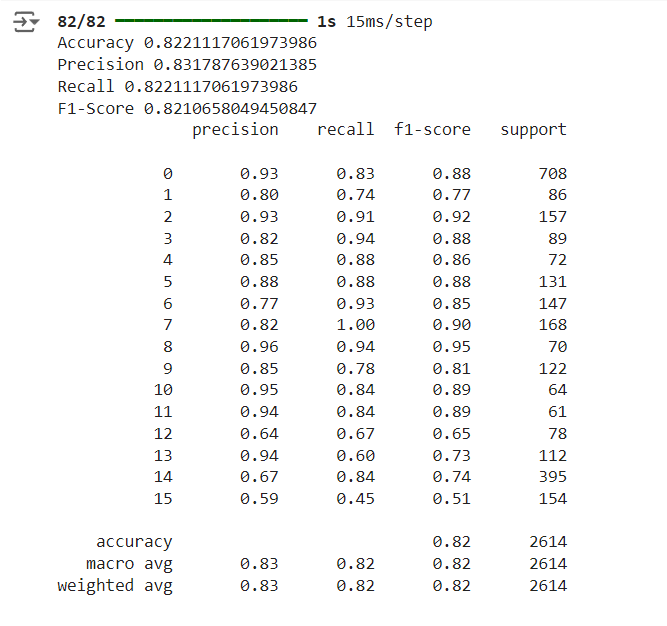

In [ ]:
results_on_validation_data.loc[7] = ['LSTM(Bi-directional)+Glove(Pre-trained)+BERT_Aug',0.8221117061973986,0.831787639021385,0.8221117061973986,0.8210658049450847]

In [ ]:
import joblib

joblib.dump(tokenizer, 'tokenizer.pkl')
joblib.dump(max_sequence_length, 'max_sequence_length.pkl')
joblib.dump(embedding_matrix, 'embedding_matrix.pkl')

from tensorflow.keras.saving import save_model

save_model(model, 'model.keras')

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import joblib
import numpy as np

tokenizer = joblib.load('tokenizer.pkl')
max_sequence_length = joblib.load('max_sequence_length.pkl')
model = load_model('model.keras')

new_text = ["power outage cantabria site hard backup circuit type network specify top cert start schedule maintenance company provider maint ticket active contact notify phone email remote dial equipment reset verify work vendor global telecom verizon gsc additional diagnostic"]

new_sequences = tokenizer.texts_to_sequences(new_text)
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

predictions = model.predict(new_padded_sequences)
predicted_class_index = np.argmax(predictions, axis=1)[0]

print(f"Predicted class index: {predicted_class_index}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 823ms/step
Predicted class index: 14


In [ ]:
import joblib

le = joblib.load('LabelEncoder.pkl')
le.inverse_transform([predicted_class_index])[0]

'GRP_8'

#### Testing [GloVe Embeddings and BERT-Aug Data for Bidirectional LSTM] on unseen data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import pickle
import joblib

with open('test_df.pickle', 'rb') as f:
   test_df = pickle.load(f)
with open('LabelEncoder.pkl', 'rb') as f:
   le = joblib.load(f)

new_sequences = tokenizer.texts_to_sequences(test_df['description'])
new_padded_sequences = pad_sequences(new_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

y_pred = model.predict(new_padded_sequences).argmax(axis=1)
test_df['assignment_group'] = le.transform(test_df['assignment_group'])

print('Accuracy',accuracy_score(y_pred,test_df['assignment_group']))
print('Precision',precision_score(y_pred,test_df['assignment_group'],average = 'weighted'))
print('Recall',recall_score(y_pred,test_df['assignment_group'],average = 'weighted'))
print('F1-Score',f1_score(y_pred,test_df['assignment_group'],average = 'weighted'))
print(classification_report(y_pred,test_df['assignment_group']))

23/23 ━━━━━━━━━━━━━━━━━━━━ 22s 912ms/step
Accuracy 0.685997171145686
Precision 0.7054641464592714
Recall 0.685997171145686
F1-Score 0.6865107580501806
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       370
           1       0.57      0.62      0.59        13
           2       0.42      0.73      0.54        15
           3       0.86      0.43      0.57        28
           4       0.42      0.42      0.42        12
           5       0.38      0.32      0.35        25
           6       0.58      0.35      0.44        40
           7       0.71      0.56      0.62        36
           8       0.50      0.50      0.50        12
           9       0.15      0.21      0.18        14
          10       0.18      0.18      0.18        11
          11       0.10      0.25      0.14         4
          12       0.62      0.53      0.57        15
          13       0.28      0.62      0.38         8
          14       0.72      0.55     

# Comparing all model's performance

In [ ]:
observations_drawbacks = [
    'Baseline Model: After tuning parameters, the model performance improved.',
    'Including text length as a feature enhanced the model’s performance.',
    'SMOTE produced better results compared to ROS (Random Over Sampling).',
    'NLP augmentation outperformed SMOTE, particularly on unseen data, improving the model’s performance.',
    'BERT-based augmentation yielded lower results compared to NLP augmentation.',
    'The LSTM with pre-trained embeddings underperformed compared to traditional models due to the small dataset size and overfitting on the training data.',
    'GloVe embeddings produced similar results to Word2Vec.',
    'A bidirectional LSTM using GloVe embeddings trained on BERT-augmented data performed well on the training and validation sets but underperformed on the unseen test data, indicating a lack of generalization to new data.'
]


In [ ]:
results_on_validation_data['Observations/Drawbacks'] = observations_drawbacks
results_on_validation_data

Model  Accuracy  Precision  \
0              OneVsOne_LogisticRegression_Tuned+ROS  0.729560   0.749118   
1  OneVsOne_LogisticRegression_Tuned+New_Feature+ROS  0.743711   0.764584   
2  OneVsOne_LogisticRegression_Tuned+New_Feature+...  0.750000   0.767796   
3     OneVsOne_LogisticRegression+New_Feature+NLPAug  0.772799   0.763446   
4   OneVsOne_LogisticRegression+New_Feature+BERT_Aug  0.761006   0.748762   
5     LSTM(Bi-directional)+Word2Vec(Pre-trained)+ROS  0.718553   0.739511   
6        LSTM(Bi-directional)+Glove(Pre-trained)+ROS  0.732704   0.739597   
7   LSTM(Bi-directional)+Glove(Pre-trained)+BERT_Aug  0.822112   0.831788   

     Recall  F1_Score                             Observations/Drawbacks  
0  0.729560  0.727823  Baseline Model: After tuning parameters, the m...  
1  0.743711  0.742221  Including text length as a feature enhanced th...  
2  0.750000  0.748193  SMOTE produced better results compared to ROS ...  
3  0.772799  0.759359  NLP augmentation outperformed SMOTE, particula...  
4  0.761006  0.744705  BERT-based augmentation yielded lower results ...  
5  0.718553  0.719317  The LSTM with pre-trained embeddings underperf...  
6  0.732704  0.725685  GloVe embeddings produced similar results to W...  
7  0.822112  0.821066  A bidirectional LSTM using GloVe embeddings tr...

In [ ]:
results_on_validation_data.to_csv('results_on_validation_data.csv', index=False)